In [2]:
import os
import sys
import numpy as np
import pandas as pd
import igraph as ig
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict

sys.path.append('../python')

from mpl_settings_v3 import *
from plot_auxiliary import *
from planar import create_proximity_graph
from auxiliary import getLinearReg, get_base_network_name, powerlaw

from scipy.interpolate import interp1d

%matplotlib inline

net_type = 'DT'
param = 'param'
base_attack = 'Btw'
net_dir = os.path.join('..', 'networks', net_type)

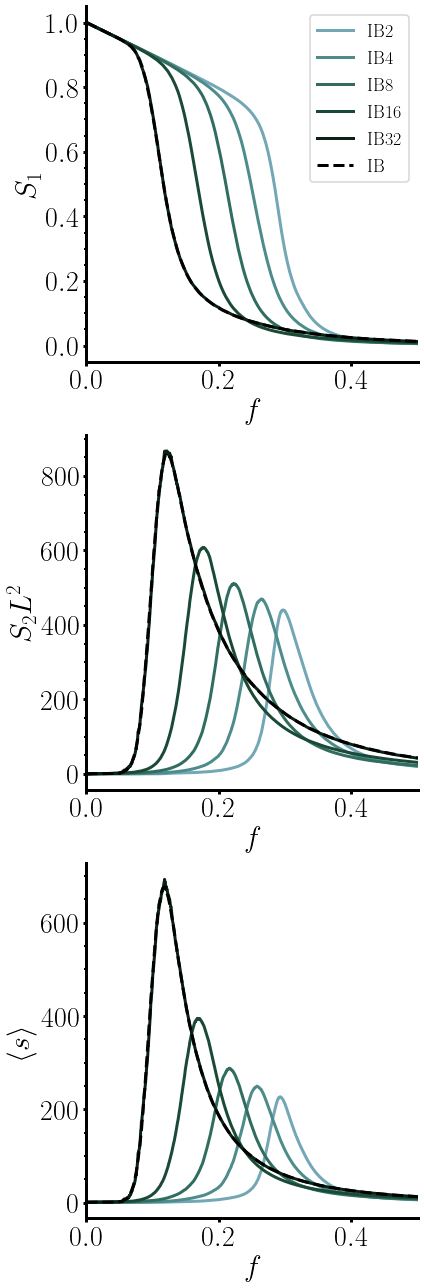

In [8]:
#Bi_range = [2, 3, 4, 6, 8, 12, 16, 24, 30]
Bi_range = [2, 4, 8, 16, 32]
N = 4096
colormap = sns.cubehelix_palette(
    len(Bi_range), start=2, rot=0.3, light=0.6, dark=0.1
)


ncols = 1
nrows = 3
fig, axes = plt.subplots(figsize=(6*ncols, 6*nrows), ncols=ncols, nrows=nrows)
axes[0].set_ylabel(r'$S_1$')
axes[1].set_ylabel(r'$S_2L^2$')
axes[2].set_ylabel(r'$\langle s \rangle$')
for ax in axes:
    ax.set_xlabel(r'$f$')
    ax.set_xlim(0, 0.5)

for i, l in enumerate(Bi_range):
    attack = 'Btw_cutoff{}'.format(l)
    try:
        df = load_dataframe(net_type, N, param, attack)
    except FileNotFoundError:
        print(N, l)
        continue
    axes[0].plot(
        df.f,
        df.Sgcc, color=colormap[i], label=attack_dict[attack]
    )
    axes[1].plot(df.f, df.Nsec, color=colormap[i])
    axes[2].plot(df.f, df.meanS, color=colormap[i])

attack = 'Btw'
df = load_dataframe(net_type, N, param, attack)
axes[0].plot(df.f, df.Sgcc, '--', color='k', label=attack_dict[attack])
axes[1].plot(df.f, df.Nsec, '--', color='k')
axes[2].plot(df.f, df.meanS, '--', color='k')

axes[0].legend(fontsize=18)

sns.despine()
plt.tight_layout()

fig_name = os.path.join(fig_dir, 'order_par_and_susceptibility_Bl_{}'.format(net_type))
plt.savefig(fig_name + '.png')
plt.savefig(fig_name + '.pdf')

plt.tight_layout()
plt.show()

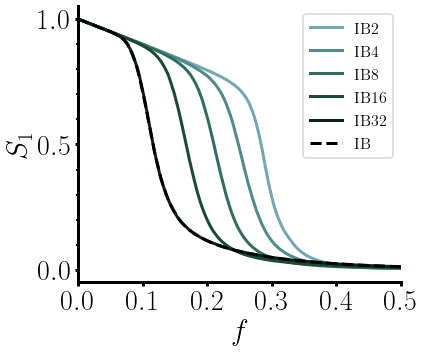

In [17]:
#Bi_range = [2, 3, 4, 6, 8, 12, 16, 24, 30]
Bi_range = [2, 4, 8, 16, 32]
N = 4096
colormap = sns.cubehelix_palette(
    len(Bi_range), start=2, rot=0.3, light=0.6, dark=0.1
)

ncols = 1
nrows = 1
fig, ax = plt.subplots(figsize=(6*ncols, 5*nrows), ncols=ncols, nrows=nrows)
ax.set_ylabel(r'$S_1$')
ax.set_xticks([0, 0.1, 0.2, 0.3, 0.4, 0.5])
ax.set_xlabel(r'$f$')
ax.set_xlim(0, 0.5)

for i, l in enumerate(Bi_range):
    attack = 'Btw_cutoff{}'.format(l)
    try:
        df = load_dataframe(net_type, N, param, attack)
    except FileNotFoundError:
        print(N, l)
        continue
    ax.plot(
        df.f,
        df.Sgcc, color=colormap[i], label=attack_dict[attack]
    )

attack = 'Btw'
df = load_dataframe(net_type, N, param, attack)
ax.plot(df.f, df.Sgcc, '--', color='k', label=attack_dict[attack])

ax.legend(fontsize=16)

sns.despine()
plt.tight_layout()

fig_name = os.path.join('../seminario', 'order_par_and_susceptibility_Bl_{}'.format(net_type))
plt.savefig(fig_name + '.png')

plt.tight_layout()
plt.show()

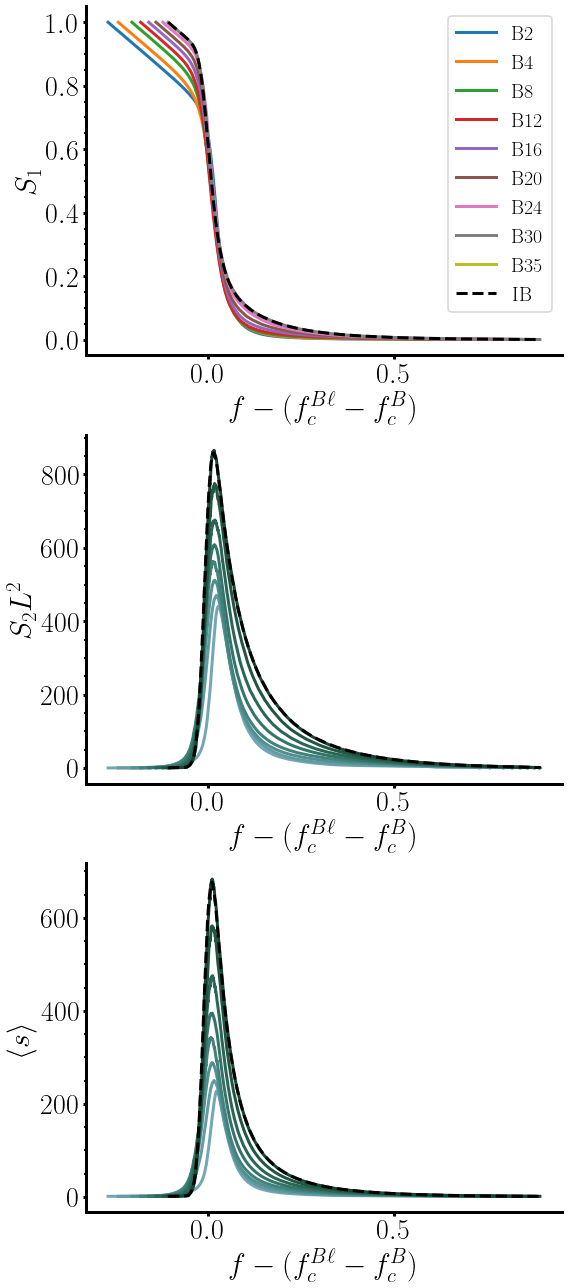

In [321]:
Bi_range = [2, 4, 8, 12, 16, 20, 24, 30, 35]
N = 4096
ell_star = 32

#colormap = sns.cubehelix_palette(
#    len(Bi_range), start=2, rot=0.3, light=0.6, dark=0.1
#)


ncols = 1
nrows = 3
fig, axes = plt.subplots(figsize=(8*ncols, 6*nrows), ncols=ncols, nrows=nrows)
axes[0].set_ylabel(r'$S_1$')
axes[1].set_ylabel(r'$S_2L^2$')
axes[2].set_ylabel(r'$\langle s \rangle$')
for ax in axes:
    ax.set_xlabel(r'$f-(f_c^{B\ell}-f_c^{B})$')
    #ax.set_xlim(0, 0.3)
    #ax.set_ylim(0.8, 1)

for i, l in enumerate(Bi_range):
    L = np.sqrt(N)
    attack = 'Btw_cutoff{}'.format(l)
    try:
        df = load_dataframe(net_type, N, param, attack)
    except FileNotFoundError:
        print(N, l)
        continue
    delta = (rc_values[N][l]-rc_values[N][0])
    axes[0].plot(
        df.f - rc_values[N][l], 
        #df.f + (pc_values_base[N]-pc_values_cutoff[N][l]), 
        df.Sgcc, 
        color=colors[i], label=attack_dict[attack]
    )
    axes[1].plot(df.f - rc_values[N][l], df.Nsec, color=colormap[i])
    axes[2].plot(df.f - rc_values[N][l], df.meanS, color=colormap[i])

attack = 'Btw'
df = load_dataframe(net_type, N, param, attack)
axes[0].plot(
    df.f-rc_values[N][0], df.Sgcc,
    '--', color='k', label=attack_dict[attack]
)
#axes[0].axhline(0.5, color='k')
#axes[0].axvline(0., color='k')
axes[1].plot(df.f-rc_values[N][0], df.Nsec, '--', color='k')
axes[2].plot(df.f-rc_values[N][0], df.meanS, '--', color='k')

axes[0].legend(fontsize=20)

sns.despine()
plt.tight_layout()

fig_name = os.path.join(fig_dir, 'order_par_and_susceptibility_Bl_{}'.format(net_type))
plt.savefig(fig_name + '.png')
plt.savefig(fig_name + '.pdf')

plt.tight_layout()
plt.show()

In [5]:
sizes = [128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536]
#sizes = [32768]
l_values = np.arange(2, 200)
nseeds = 1000
rc_values, rc_values_std = get_rc_values(
    sizes, l_values=l_values, 
    min_nseeds=100, 
    #nseeds=nseeds,
    base_attack=base_attack
)
l_cutoff = get_l_cutoff(
    sizes, threshold=1e-2, rc_values=rc_values,
    base_attack=base_attack
)
print(l_cutoff)
#l_cutoff[8192] = 45

128
256
512
1024
2048
4096
8192
16384
32768
65536
{128: 4, 256: 7, 512: 11, 1024: 16, 2048: 22, 4096: 31, 8192: 42, 16384: 57, 32768: 80}


20
26
35
46
61
96
115


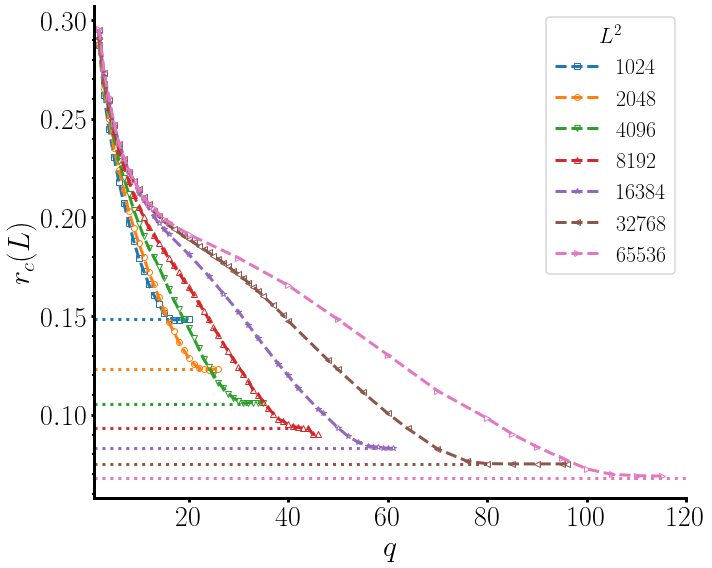

In [13]:
xlim = 1., 120

ncols = 1
nrows = 1
fig, ax = plt.subplots(figsize=(10*ncols,8*nrows), ncols=ncols, nrows=nrows)

#ax.tick_params(which='minor', length=5)
#ax.tick_params(which='major', length=8)

#ax.set_xscale('log')
ax.set_xlim(xlim)
#ax.set_xticks([2, 4, 8, 16, 32, 64])
#ax.get_xaxis().set_minor_formatter(mpl.ticker.NullFormatter())
#ax.get_xaxis().set_major_formatter(mpl.ticker.ScalarFormatter())
#ax.set_yscale('log')
#ax.set_ylim(0.05, 0.4)
#ax.set_yticks([0.1, 0.3])
#ax.get_yaxis().set_minor_formatter(mpl.ticker.NullFormatter())
#ax.get_yaxis().set_major_formatter(mpl.ticker.ScalarFormatter())

#ax.grid(True)
#ax.set_ylim(0, 0.15)
ax.set_xlabel(r'$q$')
ax.set_ylabel(r'$r_c(L)$')
_sizes = sizes[3:]
#_sizes = [32768]
for i, size in enumerate(_sizes): 
    L = np.sqrt(size)
    #_rc_values[size][rc_values[size]<1.01*rc_values[size][0]] = np.nan
    mask = ~np.isnan(rc_values[size][1:])
    
    X = l_values[mask]
    Y = rc_values[size][1:][mask]
    Y_std = rc_values_std[size][1:][mask]
    
    try:
        l_cutoff_idx = np.where(X == l_cutoff[size])[0][0] + 5
    except:
        l_cuotff_idx = -1
    
    X, Y, Y_std = X[:l_cutoff_idx], Y[:l_cutoff_idx], Y_std[:l_cutoff_idx] 
    
    #ax.plot(l_values, rc_values[size][1:], 'o-', 
    ax.plot(X, Y, '--' + markers[i], fillstyle='none',
            label=r'${{{}}}$'.format(size)
    )
    #ax.errorbar(X, Y, Y_std, color=f'C{i}')
    #ax.fill_between(X, Y-Y_std, Y+Y_std, alpha=0.7, color=f'C{i}')
    #ax.fill_between(
    #    xlim, 
    #    rc_values[size][0]-rc_values_std[size][0], 
    #    rc_values[size][0]+rc_values_std[size][0],
    #    alpha=0.2, color=f'C{i}')
    print(X[-1])
    if size in l_cutoff:
        ax.axhline(
            rc_values[size][0],
            0, l_cutoff[size]/xlim[1],
            linestyle=':', color=colors[i]
        )
    else:
        ax.axhline(
            rc_values[size][0],
            linestyle=':', color=colors[i]
        )
    #if size in l_cutoff:
    #    ax.axvline(l_cutoff[size], linestyle=':', color=colors[i])
legend = ax.legend(loc='best', fontsize=22)
legend.set_title(r'$L^2$', prop={'size':22})
    
sns.despine()
plt.tight_layout()
fig_name = os.path.join(fig_dir, 'peak_shifting_Bl_rc_{}_a'.format(net_type))
plt.savefig(fig_name + '.png', transparent=False)
plt.savefig(fig_name + '.pdf')
plt.show()

In [22]:
aux = {
    size: {l: rc-val[0] for l, rc in enumerate(val[1:], start=2) if ~np.isnan(rc)} 
    for size, val in rc_values.items()
}
aux[32768]
#set(range(2, 100)).difference(list(aux[8192].keys()))

{2: 0.21980508422851563,
 3: 0.19813153076171874,
 4: 0.18432122802734374,
 5: 0.17197476196289063,
 6: 0.16206497192382813,
 7: 0.15466571044921876,
 8: 0.14817239379882813,
 9: 0.14361361694335936,
 10: 0.13930136108398436,
 11: 0.13521792602539062,
 12: 0.13177572631835938,
 13: 0.12833993530273438,
 14: 0.12563519287109373,
 15: 0.1233118896484375,
 16: 0.12092269897460936,
 17: 0.11920712280273438,
 18: 0.11741250610351561,
 19: 0.11540734863281249,
 20: 0.11393133544921874,
 21: 0.112250732421875,
 22: 0.11044235229492186,
 23: 0.10903646850585938,
 24: 0.10714071655273436,
 25: 0.10551507568359375,
 26: 0.10378735351562499,
 27: 0.10197763061523438,
 28: 0.100096435546875,
 29: 0.09795736694335938,
 30: 0.09625711059570313,
 31: 0.09408364868164062,
 32: 0.09190069580078125,
 33: 0.08975970458984375,
 34: 0.08749475097656251,
 35: 0.08502212524414063,
 37: 0.080315185546875,
 39: 0.07537710571289061,
 40: 0.07251513671874998,
 48: 0.052615600585937505,
 50: 0.04787466430664061,


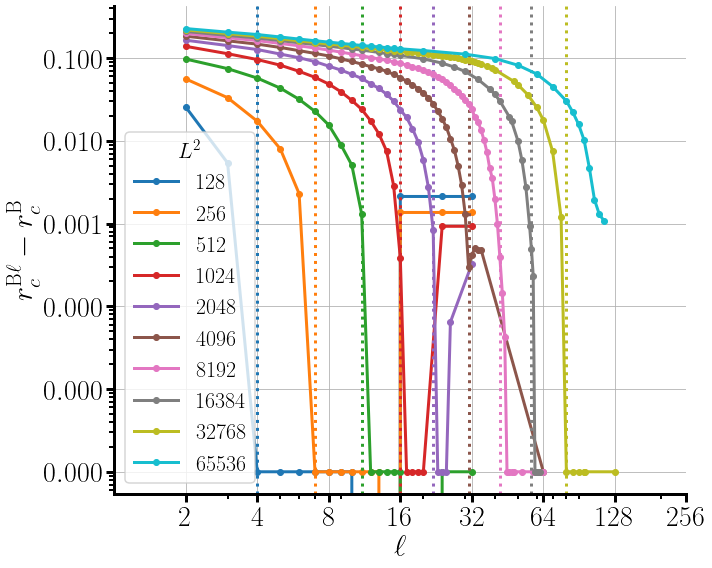

In [31]:
ncols = 1
nrows = 1
fig, ax = plt.subplots(figsize=(10*ncols,8*nrows), ncols=ncols, nrows=nrows)

ax.tick_params(which='minor', length=5)
ax.tick_params(which='major', length=8)

ax.set_xscale('log')
ax.set_xlim(1., 100)
ax.set_xticks([2, 4, 8, 16, 32, 64, 128, 256])
ax.get_xaxis().set_minor_formatter(mpl.ticker.NullFormatter())
ax.get_xaxis().set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_yscale('log')
#ax.set_ylim(1e-9, 5e-1)
ax.get_yaxis().set_minor_formatter(mpl.ticker.NullFormatter())
ax.get_yaxis().set_major_formatter(mpl.ticker.ScalarFormatter())

ax.set_xlabel(r'$\ell$')
ax.set_ylabel(r'$r^{\mathrm{B}\ell}_c - r^{\mathrm{B}}_c$')


for i, size in enumerate(sizes):
    mask = ~np.isnan(rc_values[size][1:])
    X = l_values[mask]
    Y = rc_values[size][1:][mask] - rc_values[size][0]
    th = 1e-6
    Y[Y<0] = th
    ax.plot(X, Y, 'o-', label=r'${{{}}}$'.format(size))
    if size in l_cutoff:
        ax.axvline(l_cutoff[size], linestyle=':', color=colors[i])
legend = ax.legend(loc='lower left', fontsize=22)
legend.set_title(r'$L^2$', prop={'size':22})
    
sns.despine()
ax.grid(True)
plt.tight_layout()
plt.show()

Intento colapsar las curvas

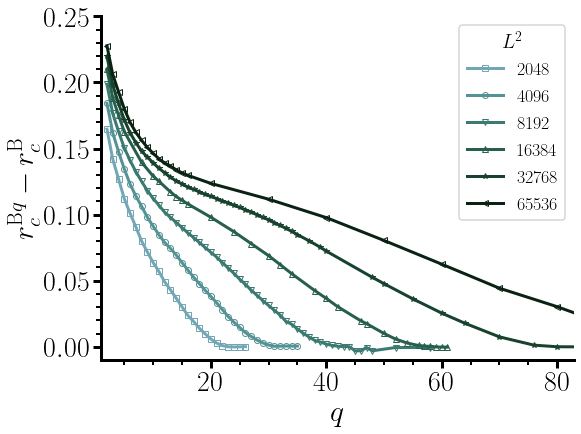

In [9]:
ncols = 1
nrows = 1
fig, ax = plt.subplots(figsize=(8*ncols,6*nrows), ncols=ncols, nrows=nrows)

ax.tick_params(which='minor', length=5)
ax.tick_params(which='major', length=8)

#ax.set_xscale('log')
#ax.set_xlim(0, 0.8)
#ax.set_xticks([2, 4, 8, 16, 32, 64])
ax.get_xaxis().set_minor_formatter(mpl.ticker.NullFormatter())
ax.get_xaxis().set_major_formatter(mpl.ticker.ScalarFormatter())
#ax.set_yscale('log')
#ax.set_ylim(1e-9, 1)
#ax.get_yaxis().set_minor_formatter(mpl.ticker.NullFormatter())
#ax.get_yaxis().set_major_formatter(mpl.ticker.ScalarFormatter())

#ax.set_xlabel(r'$\ell/L^{\alpha}$')
ax.set_xlabel(r'$q$')
#ax.set_ylabel(r'$r^{\mathrm{B}\ell}_c - r^{\mathrm{B}}_c$')
ax.set_ylabel(r'$r^{\mathrm{B}q}_c - r^{\mathrm{B}}_c$')

_l_cutoff = {
    k: v for k, v in l_cutoff.items()
}
#crossing = 0.105
crossing = 0
#alpha = 1
alpha = 0
_sizes = [size for size in sizes if (size > 1040) & (size < 153000)]
#_sizes = [8192]
#_sizes = [16384]
l_cutoff_interp = {}

colormap = sns.cubehelix_palette(
    len(_sizes), start=2, rot=0.3, light=0.6, dark=0.1
)

for i, size in enumerate(_sizes):
    
    #df = load_dataset(net_type, size, param, nseeds=nseeds)
    
    mask = ~np.isnan(rc_values[size][1:])
    #X = _l_cutoff[size] - l_values[mask]
    L = np.sqrt(size)
    X = l_values[mask]*L**(-alpha)
    #X = l_values[mask] - l_cutoff[size]
    Y = rc_values[size][1:][mask] - rc_values[size][0]
    #th = 1e-6
    #Y[Y<0] = th
    
    mask = X>0
    X = X[mask]
    Y = Y[mask]#*size
    ax.plot(
        X[:-1],
        Y[:-1], 
        '-' + markers[i], 
        #color=f'C{i}',
        color=colormap[i],
        label=r'${{{}}}$'.format(size), fillstyle='none'
    )
    
    _X = np.arange(np.min(X), np.max(X), 0.01)
    Y_interp = interp1d(X, Y, kind='cubic')
    th = 0.001
    #idx = np.where(Y_interp(_X) < th)[0][0]
    #ax.plot(_X, Y_interp(_X))
    #ax.axvline(l_cutoff[size]*L**(-alpha), linestyle=':', color=colors[i])
    #l_cutoff_interp[np.sqrt(size)] = _X[idx]*L**alpha
    #ax.axvline(_X[idx], linestyle=':', color=colors[i])
    
#ax.text(0.55, 0.85, r'$\alpha = {{{}}}$'.format(alpha), fontsize=30, transform=ax.transAxes)
legend = ax.legend(loc='best', fontsize=18)
legend.set_title(r'$L^2$', prop={'size':20})

#ax.axvline(crossing, color='gray')

ax.set_ylim(-0.01, 0.25)
#ax.set_xlim(0.0, 0.5)
ax.set_xlim(1, 83)

#ax.set_ylim(0.1, 0.2)
#ax.set_xlim(0.1, 0.3)

#ax.set_xlim(0.03, 0.2)
sns.despine()
plt.tight_layout()
plt.savefig(os.path.join(fig_dir, 'fcRl-fcR.png'))
plt.savefig(os.path.join(fig_dir, 'fcRl-fcR.pdf'))
plt.show()

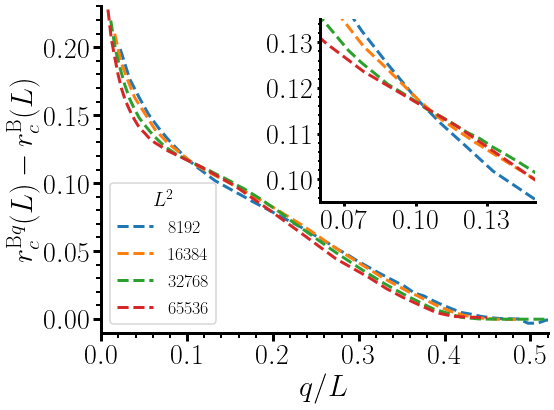

In [46]:
ncols = 1
nrows = 1
fig, ax = plt.subplots(figsize=(8*ncols, 6*nrows), ncols=ncols, nrows=nrows)

ax.tick_params(which='minor', length=5)
ax.tick_params(which='major', length=8)

#ax.set_xscale('log')
#ax.set_xlim(0, 0.8)
#ax.set_xticks([2, 4, 8, 16, 32, 64])
ax.get_xaxis().set_minor_formatter(mpl.ticker.NullFormatter())
ax.get_xaxis().set_major_formatter(mpl.ticker.ScalarFormatter())
#ax.set_yscale('log')
#ax.set_ylim(1e-9, 1)
#ax.get_yaxis().set_minor_formatter(mpl.ticker.NullFormatter())
#ax.get_yaxis().set_major_formatter(mpl.ticker.ScalarFormatter())

#ax.set_xlabel(r'$\ell/L^{\alpha}$')
ax.set_xlabel(r'$q/L$')
#ax.set_ylabel(r'$r^{\mathrm{B}\ell}_c - r^{\mathrm{B}}_c$')
ax.set_ylabel(r'$r^{\mathrm{B}q}_c(L) - r^{\mathrm{B}}_c(L)$')

_l_cutoff = {
    k: v for k, v in l_cutoff.items()
}
crossing = 0.104
alpha = 1
#alpha = 0
_sizes = [size for size in sizes if size > 4800]
#_sizes = [8192]
#_sizes = [16384]
l_cutoff_interp = {}
for i, size in enumerate(_sizes):
    
    
    mask = ~np.isnan(rc_values[size][1:])
    #X = _l_cutoff[size] - l_values[mask]
    L = np.sqrt(size)
    X = l_values[mask]*L**(-alpha)
    #X = l_values[mask] - l_cutoff[size]
    Y = rc_values[size][1:][mask] - rc_values[size][0]
    #th = 1e-6
    #Y[Y<0] = th
    
    mask = X>0
    X = X[mask]
    Y = Y[mask]#*size
    ax.plot(
        X,
        #(X-crossing),#*L**(-0.15), 
        Y, 
        '--',# + markers[i], 
        #markers[i],
        color=f'C{i}',
        label=r'${{{}}}$'.format(size), 
        #fillstyle='none'
    )

#ax.text(0.6, 0.85, r'$\alpha = {{{}}}$'.format(alpha), fontsize=30, transform=ax.transAxes)
legend = ax.legend(loc='lower left', fontsize=18)
legend.set_title(r'$L^2$', prop={'size':20})

#ax.axvline(crossing, color='gray')

ax.set_ylim(-0.01, 0.23)
ax.set_xlim(0.0, 0.52)
ax.set_xticks([0.0, 0.1, 0.2, 0.3, 0.4, 0.5])

## Crossing
#ax.set_ylim(0.1, 0.15)
#ax.set_xlim(0.05, 0.15)

bbox_to_anchor = (.52, .44, .48, .56)
axins = inset_axes(ax, width="100%", height="100%",
        bbox_to_anchor=bbox_to_anchor,
        bbox_transform=ax.transAxes)
axins.set_xlim(0.06, 0.15)
axins.set_ylim(0.095, 0.135)
axins.set_xticks([0.07, 0.10, 0.13])
axins.set_yticks([0.1, 0.11, 0.12, 0.13])
for i, size in enumerate(_sizes):
    
    mask = ~np.isnan(rc_values[size][1:])
    L = np.sqrt(size)
    X = l_values[mask]*L**(-alpha)

    Y = rc_values[size][1:][mask] - rc_values[size][0]

    mask = X>0
    X = X[mask]
    Y = Y[mask]
    axins.plot(
        X, Y, 
        '--',# + markers[i], 
        color=f'C{i}',
        label=r'${{{}}}$'.format(size)
    )

sns.despine()
#plt.tight_layout()
plt.show()

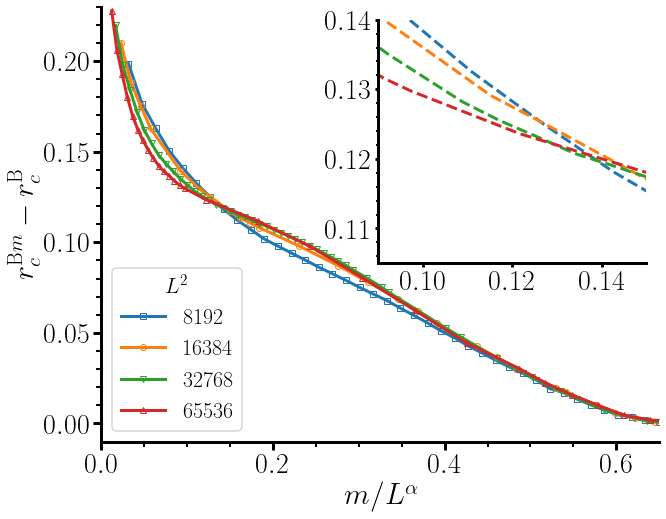

In [64]:
ncols = 1
nrows = 1
fig, ax = plt.subplots(figsize=(10*ncols,8*nrows), ncols=ncols, nrows=nrows)

ax.tick_params(which='minor', length=5)
ax.tick_params(which='major', length=8)

#ax.set_xscale('log')
#ax.set_xlim(0, 0.8)
#ax.set_xticks([2, 4, 8, 16, 32, 64])
ax.get_xaxis().set_minor_formatter(mpl.ticker.NullFormatter())
ax.get_xaxis().set_major_formatter(mpl.ticker.ScalarFormatter())
#ax.set_yscale('log')
#ax.set_ylim(1e-9, 1)
#ax.get_yaxis().set_minor_formatter(mpl.ticker.NullFormatter())
#ax.get_yaxis().set_major_formatter(mpl.ticker.ScalarFormatter())

#ax.set_xlabel(r'$\ell/L^{\alpha}$')
ax.set_xlabel(r'$m/L^{\alpha}$')
#ax.set_ylabel(r'$r^{\mathrm{B}\ell}_c - r^{\mathrm{B}}_c$')
ax.set_ylabel(r'$r^{\mathrm{B}m}_c - r^{\mathrm{B}}_c$')

_l_cutoff = {
    k: v for k, v in l_cutoff.items()
}
#crossing = 0.105
crossing = 0
alpha = 0.92
#alpha = 0
_sizes = [size for size in sizes if size > 4800]
#_sizes = [16384]
l_cutoff_interp = {}
for i, size in enumerate(_sizes):
    
    #df = load_dataset(net_type, size, param, nseeds=nseeds)
    
    mask = ~np.isnan(rc_values[size][1:])
    #X = _l_cutoff[size] - l_values[mask]
    L = np.sqrt(size)
    X = l_values[mask] / L**alpha
    #X = (l_values[mask] - l_cutoff[size]) / l_cutoff[size]
    Y = (rc_values[size][1:][mask] - rc_values[size][0])# / rc_values[size][0]

    ax.plot(
        X,
        Y, 
        '-' + markers[i], 
        color=f'C{i}',
        label=r'${{{}}}$'.format(size), fillstyle='none'
    )

ax.text(0.55, 0.85, r'$\alpha = {{{}}}$'.format(alpha), fontsize=30, transform=ax.transAxes)
legend = ax.legend(loc='lower left', fontsize=22)
legend.set_title(r'$L^2$', prop={'size':22})

ax.set_xlim(0.0, 0.65)
ax.set_ylim(-0.01, 0.23)

bbox_to_anchor = (.52, .44, .48, .56)
axins = inset_axes(ax, width="100%", height="100%",
        bbox_to_anchor=bbox_to_anchor,
        bbox_transform=ax.transAxes)
axins.set_xlim(0.09, 0.15)
axins.set_ylim(0.105, 0.14)
#axins.set_xticks([0.07, 0.10, 0.13])
#axins.set_yticks([0.1, 0.11, 0.12, 0.13])
for i, size in enumerate(_sizes):
    
    mask = ~np.isnan(rc_values[size][1:])
    L = np.sqrt(size)
    X = l_values[mask]*L**(-alpha)

    Y = rc_values[size][1:][mask] - rc_values[size][0]

    mask = X>0
    X = X[mask]
    Y = Y[mask]
    axins.plot(
        X, Y, 
        '--',# + markers[i], 
        color=f'C{i}',
        label=r'${{{}}}$'.format(size)
    )

sns.despine()
plt.show()

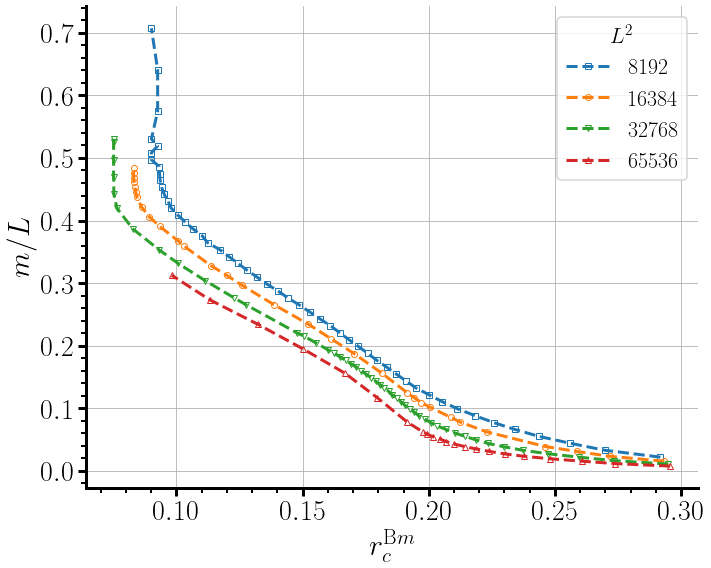

In [73]:
ncols = 1
nrows = 1
fig, ax = plt.subplots(figsize=(10*ncols,8*nrows), ncols=ncols, nrows=nrows)

ax.tick_params(which='minor', length=5)
ax.tick_params(which='major', length=8)
ax.get_xaxis().set_minor_formatter(mpl.ticker.NullFormatter())
ax.get_xaxis().set_major_formatter(mpl.ticker.ScalarFormatter())

ax.set_ylabel(r'$m/L$')
ax.set_xlabel(r'$r^{\mathrm{B}m}_c$')

_l_cutoff = {
    k: v for k, v in l_cutoff.items()
}

_sizes = [size for size in sizes if size > 4800]

l_cutoff_interp = {}
for i, size in enumerate(_sizes):

    mask = ~np.isnan(rc_values[size][1:])
    L = np.sqrt(size)
    X = l_values[mask]*L**(-alpha)
    Y = rc_values[size][1:][mask]

    
    mask = X>0
    X = X[mask]
    Y = Y[mask]
    ax.plot(
        Y,
        (X-crossing),
        '--' + markers[i], 
        color=f'C{i}',
        label=r'${{{}}}$'.format(size), fillstyle='none'
    )
    
    _X = np.arange(np.min(X), np.max(X), 0.01)
    Y_interp = interp1d(X, Y, kind='cubic')
    th = 0.001

legend = ax.legend(loc='best', fontsize=22)
legend.set_title(r'$L^2$', prop={'size':22})

ax.grid(True)

#ax.set_ylim(0.08, 0.15)
#ax.set_xlim(0.0, 0.15)
#ax.set_xlim(0.03, 0.2)
sns.despine()
plt.tight_layout()
plt.show()

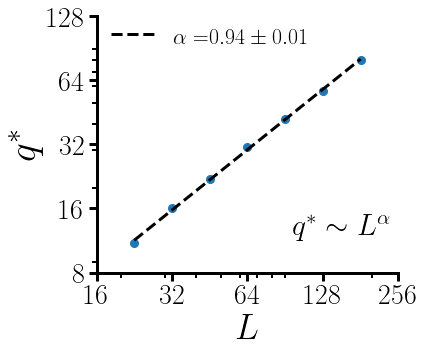

In [20]:
ncols = 1
nrows = 1
fig, ax = plt.subplots(figsize=(6*ncols,5*nrows), ncols=ncols, nrows=nrows)

ax.tick_params(which='minor', length=5)
ax.tick_params(which='major', length=8)
_sizes = [key for key in l_cutoff.keys() if key >= 512]

## Standard
X = np.sqrt(_sizes)
Y = np.array([l_cutoff[size] for size in _sizes])

## Using interpolation
#X, Y = zip(*list(l_cutoff_interp.items()))

ax.set_xscale('log')
ax.set_yscale('log')
ax.plot(X, Y, 'o', markersize=8)

Y_pred, slope, y_err = getLinearReg(X, Y)

c = Y_pred[-1] / X[-1]**slope
Y_pred = powerlaw(X, slope, c)

label = r'$\alpha = $' + r'${{{:.2f}}}\pm{{{:.2f}}}$'.format(slope, y_err)
ax.plot(X, Y_pred, '--', color='k', label=label)
ax.text(0.65, 0.15, r'$q^* \sim L^{\alpha}$', fontsize=30, transform=ax.transAxes)


_c = Y_pred[-3] / X[-3]
_Y_pred = powerlaw(X, 1, _c)

label = r'$\mathrm{slope} = 1$' 
#ax.plot(X, _Y_pred, '-', color='gray', label=label)


#ax.set_xlim(12, 128)
ax.set_xticks([16, 32, 64, 128, 256])
ax.get_xaxis().set_minor_formatter(mpl.ticker.NullFormatter())
ax.get_xaxis().set_major_formatter(mpl.ticker.ScalarFormatter())

ax.set_yticks([8, 16, 32, 64, 128])
ax.get_yaxis().set_minor_formatter(mpl.ticker.NullFormatter())
ax.get_yaxis().set_major_formatter(mpl.ticker.ScalarFormatter())

ax.legend(loc=(0.02, 0.85), frameon=False, fontsize=22)

ax.set_xlabel(r'$L$', fontsize=36)
ax.set_ylabel(r'$q^*$', fontsize=40)
    
sns.despine()
fig_name = os.path.join(fig_dir, 'peak_shifting_Bl_rc_{}_b'.format(net_type))
fig_name = os.path.join('../seminario/peak_shifting_Bl_rc_{}_b'.format(net_type))
plt.savefig(fig_name + '.png', transparent=False)
plt.savefig(fig_name + '.pdf')

plt.tight_layout()
plt.show()

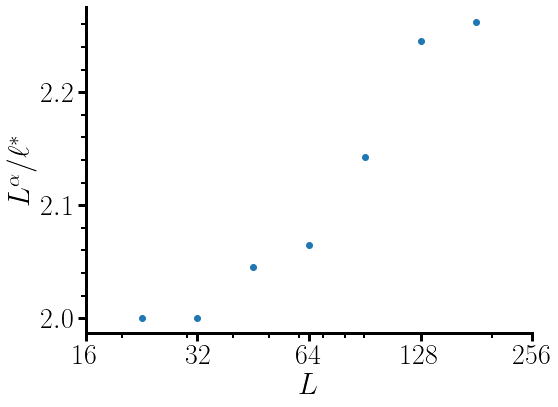

In [68]:
alpha = 1
X = np.sqrt(list(l_cutoff.keys()))
Y = [int(np.sqrt(size)**alpha) / cutoff for size, cutoff in l_cutoff.items()]
fig, ax = plt.subplots(figsize=(8,6))
ax.set_xscale('log')
ax.set_xlim(16, 256)
ax.tick_params(which='minor', length=5)
ax.tick_params(which='major', length=8)
ax.set_xticks([16, 32, 64, 128, 256])
ax.get_xaxis().set_minor_formatter(mpl.ticker.NullFormatter())
ax.get_xaxis().set_major_formatter(mpl.ticker.ScalarFormatter())

ax.plot(X[2:], Y[2:], 'o')
ax.set_xlabel(r'$L$')
ax.set_ylabel(r'$L^{\alpha}/\ell^*$')

sns.despine()
plt.show()

In [23]:
for i, (size, cutoff) in enumerate(l_cutoff.items()):
    l = np.sqrt(size)
    print(int(l), cutoff, np.round(powerlaw(l, slope, c)))
powerlaw(np.sqrt(32768), slope, c)

22 11 11.0
32 15 15.0
45 22 21.0
64 30 30.0
90 41 41.0
128 56 57.0


78.64802645965848

In [3]:
base_attack = 'Btw'
sizes = [128, 256, 512, 1024, 2048, 4096, 8192, 16384]
sizes = [8192]
l_values = np.arange(2, 100)
nseeds_values = [100, 1000, 10000]
rc_values_dict = {}
for nseeds in nseeds_values:
    rc_values, rc_values_std = get_rc_values(sizes, l_values=l_values, nseeds=nseeds, base_attack=base_attack)
    rc_values_dict[nseeds] = rc_values
    
l_cutoff = get_l_cutoff(sizes, threshold=0.02, rc_values=rc_values, base_attack=base_attack)

8192
8192
8192


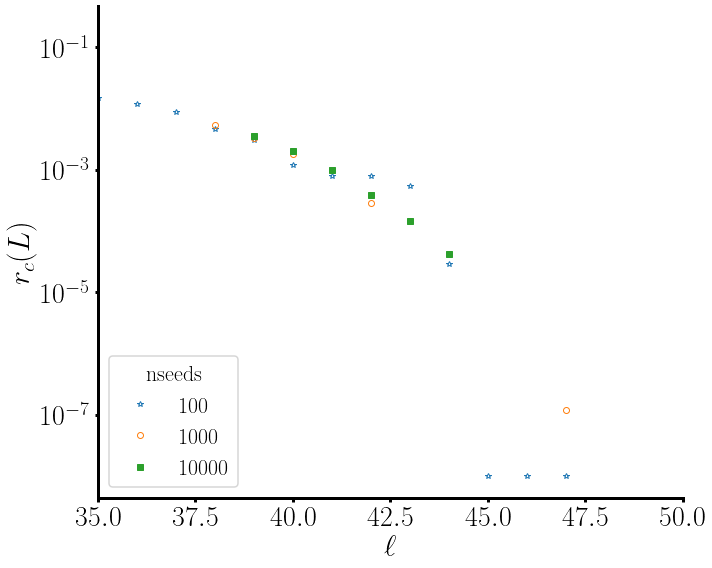

In [51]:
linestyles = [':', '--', '-']
markers = ['*', 'o', 's']
fillstyles = ['none', 'none', 'full']

def plot_rc_one_size(size, **kw):

    xlim = kw.get('xlim', (2, 100))
    ylim = kw.get('ylim', (-0.1, 0.2))
    ncols = 1
    nrows = 1
    fig, ax = plt.subplots(figsize=(10*ncols,8*nrows), ncols=ncols, nrows=nrows)
    ax.set_xlabel(r'$\ell$')
    ax.set_ylabel(r'$r_c(L)$')
    ax.set_xlim(xlim)
    #ax.set_ylim(ylim)
    ax.set_yscale('log')
    sizes = [8192]
    for j, nseeds in enumerate(nseeds_values):
        rc_values = rc_values_dict[nseeds]
        
        Y = rc_values[size][1:] - rc_values[size][0]
        th = 1e-8
        Y[Y<0] = th
        ax.plot(
            l_values, Y, marker=markers[j], linestyle='',
            color=f'C{j}', fillstyle=fillstyles[j], label=r'${{{}}}$'.format(nseeds)
        )
    legend = ax.legend(loc='lower left', fontsize=22)
    legend.set_title(r'$\mathrm{nseeds}$', prop={'size':22})

    sns.despine()
    plt.tight_layout()
    plt.show()
    
size = 8192
kw = {'xlim': (35, 50), 'ylim': (-0.01, 0.015)}
plot_rc_one_size(size, **kw)    

1.092 +- 0.070


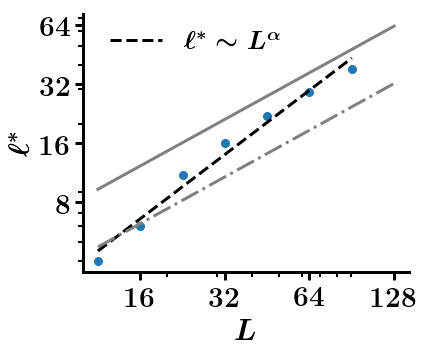

In [71]:
ncols = 1
nrows = 1
fig, ax = plt.subplots(figsize=(6*ncols,5*nrows), ncols=ncols, nrows=nrows)


ax.tick_params(which='minor', length=5)
ax.tick_params(which='major', length=8)

X = np.sqrt(list(l_cutoff.keys()))
Y = np.array(list(l_cutoff.values()))
ax.set_xlabel(r'$L$')
ax.set_ylabel(r'$\ell^*$')
ax.set_xscale('log')
ax.set_yscale('log')
ax.plot(X, Y, 'o', markersize=8)
Y_pred, slope, y_err = getLinearReg(X, Y)
print('{:.3f} +- {:.3f}'.format(slope, y_err))
label = r'$\ell^* \sim L^{\alpha}$'
ax.plot(X, Y_pred, '--', color='k', label=label)


X =  np.sqrt([128, 256, 512, 1024, 2048, 4096, 8192, 16384])
meanls = [4.721,  6.177,  8.102, 10.801, 13.946, 18.562, 24.187, 32.666]
diameters = [9.37, 12.42, 15.94, 20.66, 27.25, 36.01, 48.5, 64.7]
linestyles = ['-.', '-']
for i, Y in enumerate([meanls, diameters]):
    Y_pred, slope, y_err = getLinearReg(X, Y)    
    c = Y[0] / X[0]**slope
    text = r'${{{:.2f}}}\pm{{{:.2f}}}$'.format(slope, y_err)
    k = 3
    ax.plot(X, Y_pred, linestyles[i], color='grey')

#ax.set_xlim(12, 128)
ax.set_xticks([16, 32, 64, 128])
ax.get_xaxis().set_minor_formatter(mpl.ticker.NullFormatter())
ax.get_xaxis().set_major_formatter(mpl.ticker.ScalarFormatter())

ax.set_yticks([8, 16, 32, 64])
ax.get_yaxis().set_minor_formatter(mpl.ticker.NullFormatter())
ax.get_yaxis().set_major_formatter(mpl.ticker.ScalarFormatter())

ax.legend(loc=(0.05, 0.8), frameon=False)
    
sns.despine()
plt.tight_layout()
fig_name = os.path.join(fig_dir, 'ell_scaling_{}'.format(net_type))
plt.savefig(fig_name + '.png')
plt.savefig(fig_name + '.pdf')

plt.tight_layout()
plt.show()

1024
2048
4096
8192


IndexError: list index out of range

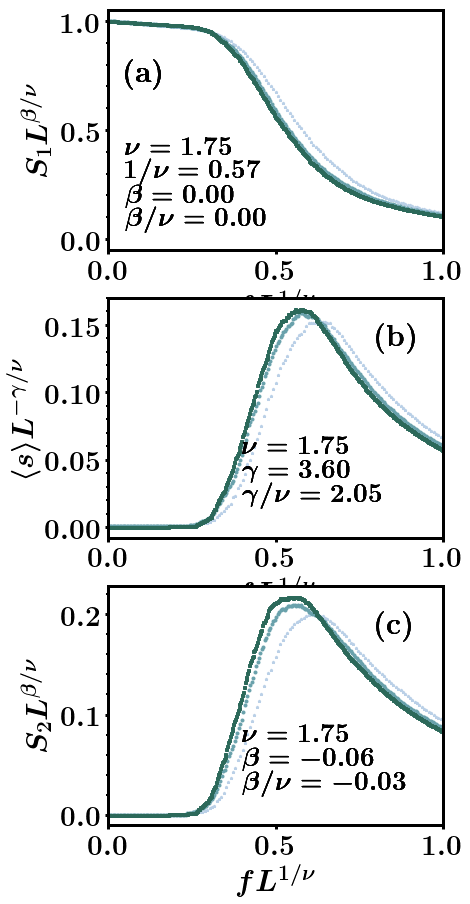

In [114]:
sizes = [1024, 2048, 4096, 8192, 16384]

l_cutoff = get_l_cutoff(sizes, rc_values=rc_values, threshold=0.02)

dfs = {}
for N in sizes:
    attack = 'BtwU_cutoff{}'.format(l_cutoff[N]) 
    try:
        dfs[N] = load_dataframe(net_type, N, param, attack, min_nseeds=100)
    except FileNotFoundError:
        continue
        
N_values = np.sort(list(dfs.keys()))
L_values = np.sqrt(N_values)

colormap = sns.cubehelix_palette(
    len(L_values), start=2, rot=0.3, light=0.8, dark=0.1
)

ncols = 1
nrows = 3
fig, axes = plt.subplots(figsize=(6*ncols, 5*nrows), ncols=ncols, nrows=nrows)

for ax in axes:
    ax.set_xlim(0, 1)
    ax.set_xlabel(r'$f L^{1/\nu}$')

ax = axes[0]
ax.set_ylabel(r'$S_1 L^{\beta/\nu}$')
ax = axes[1]
ax.set_ylabel(r'$\langle s\rangle L^{-\gamma/\nu}$')
ax = axes[2]
ax.set_ylabel(r'$S_2 L^{\beta/\nu}$')

for i, N in enumerate(N_values):
    print(N)
    df = dfs[N]
    L = np.sqrt(N)
    
    ax = axes[0]
    ax.text(0.05, 0.7, letters[0], transform=ax.transAxes, fontsize=30)
    #one_over_nu = 5/9
    one_over_nu = 0.57
    nu = 1 / one_over_nu
    beta = 0
    beta_over_nu = beta / nu
    ax.plot(df.f*L**one_over_nu, df.Sgcc*N**(beta_over_nu), linestyle='', marker=markers[i], markersize=3,
        label=r'${{{}}}$'.format(N), color=colormap[i])
    ax.text(0.05, 0.4, r'$\nu = {{{:.2f}}}$'.format(nu), 
            transform=ax.transAxes, fontsize=26)
    ax.text(0.05, 0.3, r'$1/\nu = {{{:.2f}}}$'.format(one_over_nu), 
            transform=ax.transAxes, fontsize=26)
    ax.text(0.05, 0.2, r'$\beta = {{{:.2f}}}$'.format(beta), 
            transform=ax.transAxes, fontsize=26)
    ax.text(0.05, 0.1, r'$\beta/\nu = {{{:.2f}}}$'.format(beta_over_nu), 
            transform=ax.transAxes, fontsize=26)
    
    
    ax = axes[1]
    ax.text(0.8, 0.8, letters[1], transform=ax.transAxes, fontsize=30)
    #one_over_nu = 5/9
    one_over_nu = 0.57
    nu = 1 / one_over_nu
    gamma_over_nu = 2.05
    gamma = gamma_over_nu * nu
    ax.plot(
        df.f*L**one_over_nu, df.meanS*L**(-gamma_over_nu), linestyle='', 
        marker=markers[i], markersize=3, color=colormap[i]
    )
    ax.text(0.4, 0.35, r'$\nu = {{{:.2f}}}$'.format(nu), 
            transform=ax.transAxes, fontsize=26)
    ax.text(0.4, 0.25, r'$\gamma = {{{:.2f}}}$'.format(gamma), 
            transform=ax.transAxes, fontsize=26)
    ax.text(0.4, 0.15, r'$\gamma/\nu = {{{:.2f}}}$'.format(gamma_over_nu), 
            transform=ax.transAxes, fontsize=26)
    
    
    ax = axes[2]
    ax.text(0.8, 0.8, letters[2], transform=ax.transAxes, fontsize=30)
    #one_over_nu = 5/9
    one_over_nu = 0.57
    nu = 1 / one_over_nu
    beta = -0.06
    beta_over_nu = beta / nu
    ax.plot(
        df.f*L**one_over_nu, df.Nsec*L**(beta_over_nu-2), linestyle='', 
        marker=markers[i], markersize=3, color=colormap[i]
    )
    ax.text(0.4, 0.35, r'$\nu = {{{:.2f}}}$'.format(nu), 
            transform=ax.transAxes, fontsize=26)
    ax.text(0.4, 0.25, r'$\beta = {{{:.2f}}}$'.format(beta), 
            transform=ax.transAxes, fontsize=26)
    ax.text(0.4, 0.15, r'$\beta/\nu = {{{:.2f}}}$'.format(beta_over_nu), 
            transform=ax.transAxes, fontsize=26)


legend = axes[0].legend(fontsize=22, frameon=False)
legend.set_title(r'$L^2$', prop={'size':22})

sns.despine()
plt.tight_layout()
fig_name = os.path.join(fig_dir, 'collapse_Bl_B_{}'.format(net_type))
plt.savefig(fig_name + '.png')
plt.savefig(fig_name + '.pdf')
plt.show()

KeyError: 128

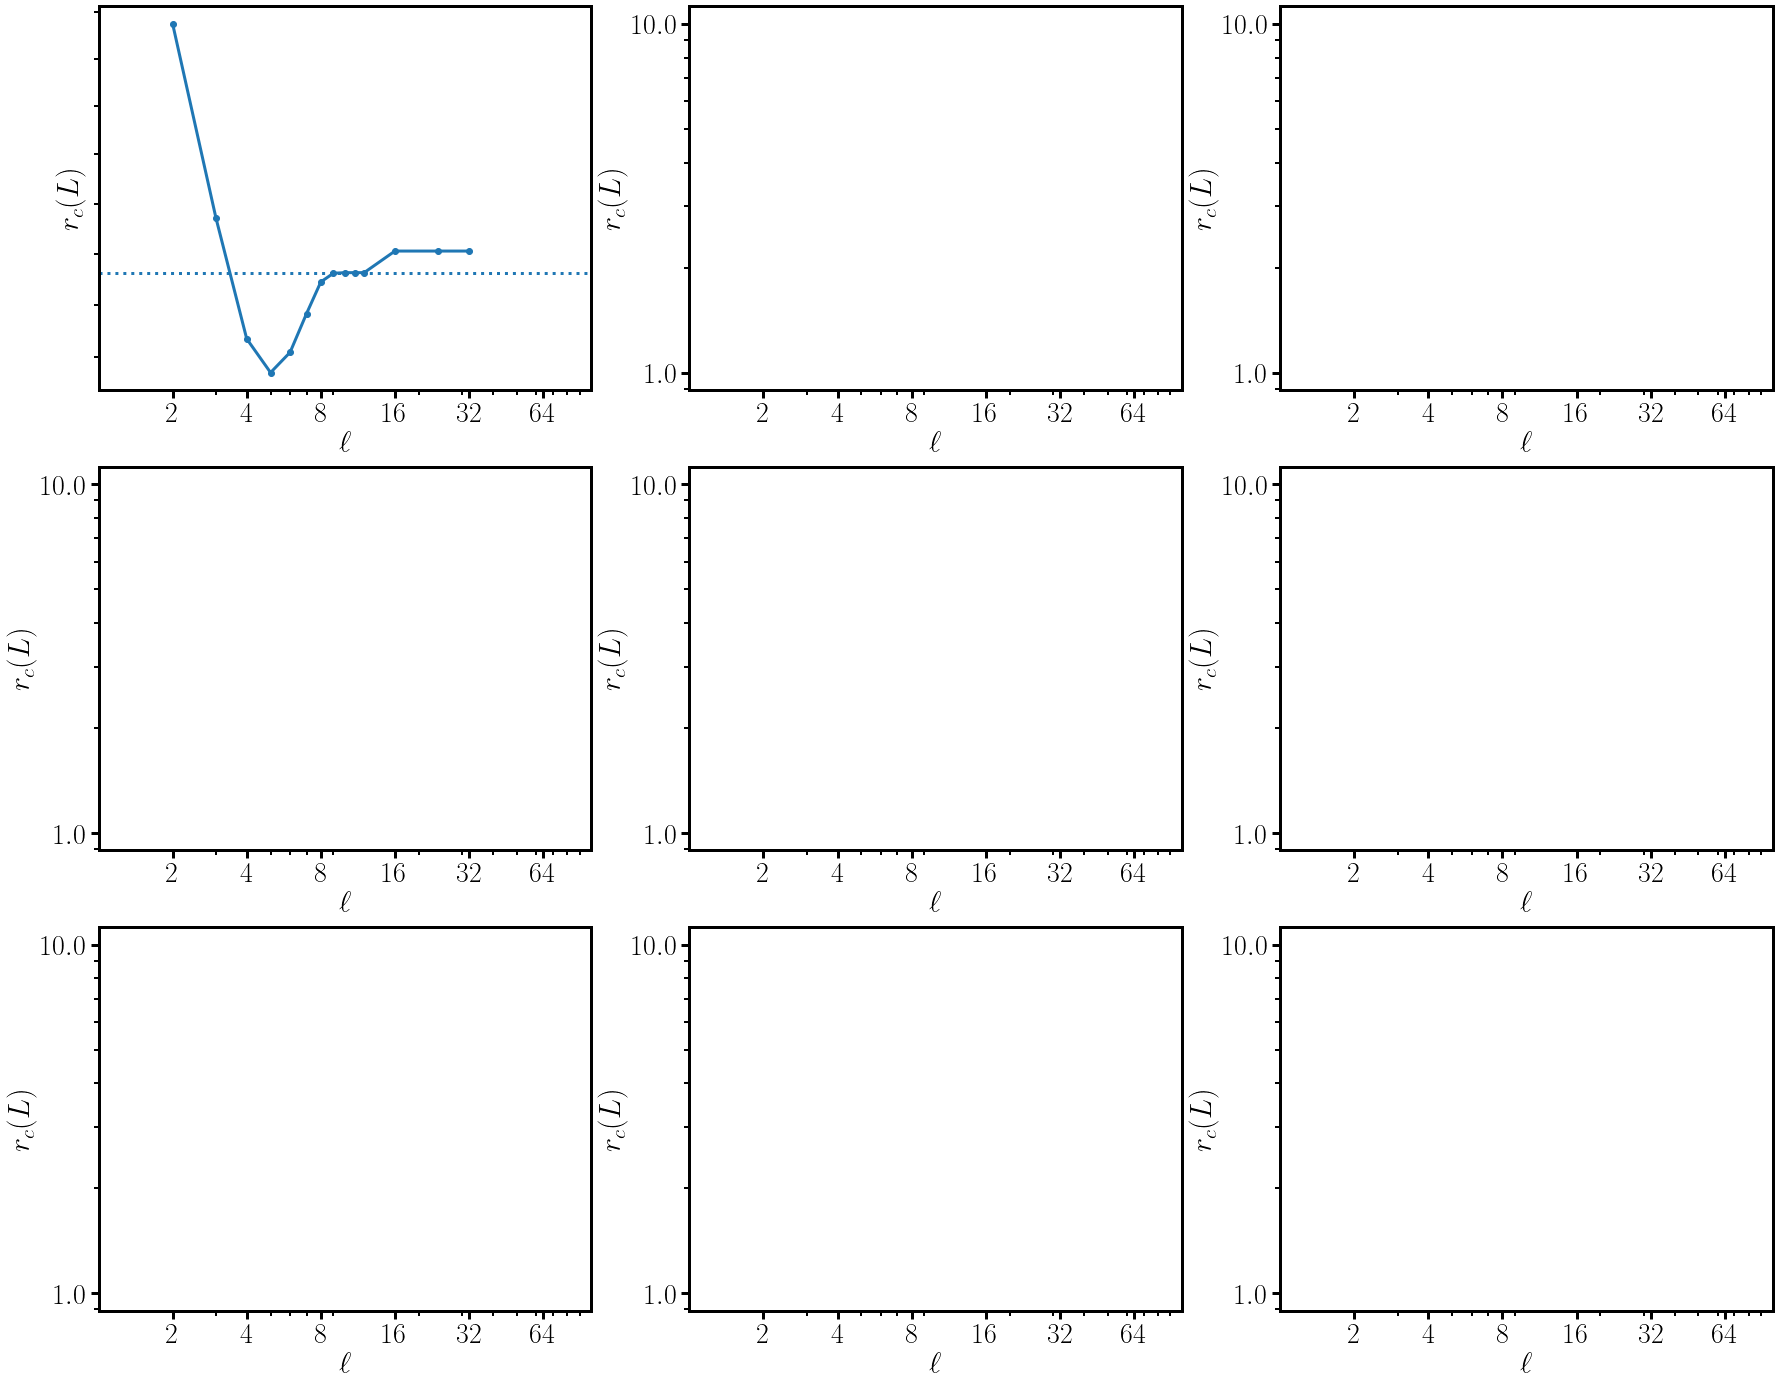

In [4]:
ncols = 3
nrows = len(sizes) // ncols + 1
fig, axes = plt.subplots(figsize=(10*ncols,8*nrows), ncols=ncols, nrows=nrows)
axes = axes.flatten()

for ax in axes:
    ax.tick_params(which='minor', length=5)
    ax.tick_params(which='major', length=8)
    ax.set_xscale('log')
    ax.set_xlim(1., 100)
    ax.set_xticks([2, 4, 8, 16, 32, 64])
    ax.get_xaxis().set_minor_formatter(mpl.ticker.NullFormatter())
    ax.get_xaxis().set_major_formatter(mpl.ticker.ScalarFormatter())
    ax.set_yscale('log')
    ax.get_yaxis().set_minor_formatter(mpl.ticker.NullFormatter())
    ax.get_yaxis().set_major_formatter(mpl.ticker.ScalarFormatter())
    ax.set_xlabel(r'$\ell$')
    ax.set_ylabel(r'$r_c(L)$')


for i, size in enumerate(sizes): 

    mask = ~np.isnan(rc_values[size][1:])
    
    X = l_values[mask]
    Y = rc_values[size][1:][mask]
    
    ax = axes[i]
    ax.plot(X, Y, 'o-', 
            label=r'${{{}}}$'.format(size)
    )
    ax.axhline(rc_values[size][0], linestyle=':', color=colors[i])
    ax.axvline(l_cutoff[size], linestyle=':', color=colors[i])
legend = ax.legend(loc='lower left', fontsize=22)
legend.set_title(r'$L^2$', prop={'size':22})
    
sns.despine()
plt.tight_layout()
fig_name = os.path.join(fig_dir, 'peak_shifting_Bl_rc_{}_a'.format(net_type))
#plt.savefig(fig_name + '.png', transparent=False)
#plt.savefig(fig_name + '.pdf')

plt.tight_layout()
plt.show()

8/4/21 Intento calcular l_cutoff usando el pico en la susceptibilidad

In [81]:
from typing import List, Tuple, Dict, Optional
from collections import defaultdict

def get_peaks_by_cutoff(
    net_type: str, 
    param: str, 
    sizes: List[int], 
    base_attack: str,
    nseeds: int,
    measure: str = 'meanS',
    l_values: Optional[List[int]] = None
) -> Tuple[Dict[int, float], Dict[int, Dict[int, float]]]:
           
    if not l_values:
        l_values = list(range(2, 100))

    pc_values_base = get_peaks_base(
        net_type, param, sizes, base_attack, nseeds, measure
    )
    pc_values_cutoff = get_peaks_cutoff(
        net_type, param, sizes, base_attack, 
        nseeds, l_values, measure
    )

    return pc_values_base, pc_values_cutoff
    
    
def get_peaks_base(
    net_type: str, 
    param: str, 
    sizes: List[int], 
    base_attack: str,
    nseeds: int,
    measure: str = 'meanS'
) -> Dict[int, float]:
    
    pc_values_base = {}
    for size in sizes:
        pc_values_base[size] = get_peak(
            net_type, param, size, base_attack, nseeds
    )
    return pc_values_base
    

def get_peaks_cutoff(    
    net_type: str, 
    param: str, 
    sizes: List[int], 
    base_attack: str,
    nseeds: int,
    l_values: List[int],
    measure: str = 'meanS'
) -> Dict[int, Dict[int, float]]:
    
    pc_values_cutoff = defaultdict(list)
    for size in sizes:
        pc_values_cutoff[size] = get_peaks_cutoff_by_size(
            net_type, param, size, base_attack, 
            nseeds, l_values, measure
        )
    return pc_values_cutoff

    
def get_peaks_cutoff_by_size(
    net_type: str, 
    param: str,
    size: int,
    base_attack: str,
    nseeds: int,
    l_values: List[int],
    measure: str = 'meanS',
) -> Dict[int, float]:   
    
    return {
        l: get_peak(
            net_type, param, size, base_attack + f'_cutoff{l}', nseeds, measure
        ) for l in l_values
    }


def get_peak(
    net_type: str, 
    param: str,
    size: int,
    attack: str,
    nseeds: int,
    measure: str = 'meanS'
) -> float:
    
    try:
        df = load_dataframe(net_type, size, param, attack, nseeds)
    except FileNotFoundError:
        return np.NaN
    max_idx = df[measure].idxmax()
    try:
        max_value = df[measure][max_idx]
    except KeyError:
        print(attack, size, max_idx)
    return max_idx / size

net_type = 'DT'
param = 'param'
sizes = [1024, 2048, 4096, 8192, 16384, 32768]
base_attack = 'Btw'
measure = 'meanS'
nseeds = 1000

pc_values_base, pc_values_cutoff = get_peaks_by_cutoff(
    net_type, param, sizes, base_attack,
    nseeds, measure
)
print(pc_values_base)
#print(pc_values_cutoff)

Btw_cutoff36 4096 nan
Btw_cutoff38 4096 nan
Btw_cutoff40 4096 nan
Btw_cutoff41 4096 nan
Btw_cutoff42 4096 nan
Btw_cutoff43 4096 nan
{1024: 0.1630859375, 2048: 0.1328125, 4096: 0.117431640625, 8192: 0.1011962890625, 16384: 0.09075927734375, 32768: 0.080230712890625}


In [212]:
#pc_values_cutoff[32768]

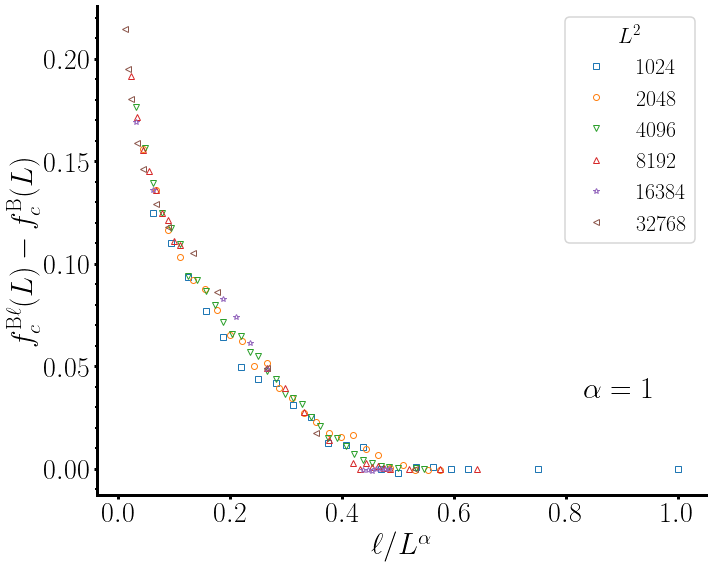

In [214]:
ncols = 1
nrows = 1
fig, ax = plt.subplots(figsize=(10*ncols,8*nrows), ncols=ncols, nrows=nrows)

ax.set_xlabel(r'$\ell/L^{\alpha}$')
ax.set_ylabel(r'$f^{\mathrm{B}\ell}_c(L) - f^{\mathrm{B}}_c(L)$')

_l_cutoff = {
    k: v for k, v in l_cutoff.items()
}
alpha = 1
_sizes = sizes
l_cutoff_interp = {}
for i, size in enumerate(_sizes):
    L = np.sqrt(size)
    X = np.zeros(len(l_values))
    Y = np.zeros(len(l_values))
    for j, l in enumerate(l_values):
        X[j] = l
        Y[j] = pc_values_cutoff[size][l] - pc_values_base[size]
    X = X*L**(-alpha)    
    ax.plot(X, Y, markers[i], label=r'${{{}}}$'.format(size), fillstyle='none')
    
    #_X = np.arange(np.min(X), np.max(X), 0.01)
    #Y_interp = interp1d(X, Y, kind='linear')
    #th = 0.01
    #idx = np.where(Y_interp(_X) < th)[0][0]
    #ax.plot(_X, Y_interp(_X))
    #ax.axvline(l_cutoff[size]*L**(-alpha), linestyle=':', color=colors[i])
    #l_cutoff_interp[np.sqrt(size)] = _X[idx]*L**alpha
    #ax.axvline(_X[idx], linestyle=':', color=colors[i])
    
ax.text(0.8, 0.2, r'$\alpha = {{{}}}$'.format(alpha), fontsize=30, transform=ax.transAxes)
legend = ax.legend(loc='best', fontsize=22)
legend.set_title(r'$L^2$', prop={'size':22})

#ax.set_ylim(-0.01, 0.04)
#ax.set_xlim(0, 0.6)
sns.despine()
plt.tight_layout()
plt.show()

In [19]:
import pathlib
from auxiliary import read_data_file
from collections import defaultdict

seeds = range(100)
net_type = 'DT'
param = 'param'
size = 128
attacks = ['Deg', 'DegU']

def get_mean_attack_stats(net_type, size, param, attack, seeds):
    for seed in seeds:
        oi_list = read_oi_list(net_type, size, param, attack, seed)
        g = read_network(net_type, size, param, attack, seed)
        attack_stats = remove_nodes(g, oi_list)
    mean_attack_stats = {key: np.zeros(size) for key in attack_stats.keys()}
    for key, value in attack_stats.items():
        mean_attack_stats[key] = mean_attack_stats[key] + attack_stats[key]
    return mean_attack_stats

def read_oi_list(net_type, size, param, attack, seed):
    net_dir_name = get_net_dir_name(net_type, size, param, seed)
    attack_dir = net_dir_name / attack
    return read_data_file(attack_dir, 'oi_list', reader='numpyInt')
    
def read_network(net_type, size, param, seed):
    net_dir_name = get_net_dir_name(net_type, size, param, seed)
    net_name = get_net_name(net_type, size, param, seed)
    return read_data_file(net_dir_name, net_name, reader='igraph')

def remove_nodes(g, oi_list):
    attack_stats = defaultdict(list)
    N = g.vcount()
    g.vs['name'] = range(N)
    for i, oi in enumerate(oi_list):
        attack_stats = update_stats(g, attack_stats, N)
        g = remove_node_by_oi(g, oi)    
    return attack_stats

def update_stats(g, attack_stats, N):
    m = g.ecount()
    n = g.vcount()
    ngcc = g.components(mode='WEAK').giant().vcount()
    attack_stats['m'].append(m)
    attack_stats['f'].append(1-n/N)
    attack_stats['Sgcc'].append(ngcc/N)
    return attack_stats

def remove_node_by_oi(g, oi):
    idx = g.vs['name'].index(oi)
    g.vs[idx].delete()
    return g

def get_net_dir_name(net_type, size, param, seed):
    return pathlib.Path(
        f'../networks/{net_type}/{net_type}_{param}/{net_type}_{param}_N{size}/{net_type}_{param}_N{size}_{seed:05d}'
    )

def get_net_name(net_type, size, param, seed):
    return f'{net_type}_{param}_N{size}_{seed:05d}'

In [49]:
mean_stats = {}
for attack in attacks:
    mean_attack_stats = get_mean_attack_stats(net_type, size, param, attack, seeds)
    mean_stats[attack] = mean_attack_stats

array([368., 358., 349., 341., 333., 325., 317., 309., 301., 294., 287.,
       280., 273., 266., 259., 252., 245., 238., 231., 225., 219., 213.,
       207., 201., 195., 189., 183., 177., 171., 165., 160., 155., 150.,
       145., 140., 135., 130., 125., 120., 116., 112., 108., 104., 100.,
        96.,  92.,  88.,  85.,  82.,  79.,  76.,  73.,  70.,  67.,  64.,
        61.,  58.,  55.,  52.,  49.,  47.,  45.,  43.,  41.,  39.,  37.,
        35.,  33.,  31.,  29.,  27.,  25.,  23.,  21.,  19.,  17.,  16.,
        15.,  14.,  13.,  12.,  11.,  10.,   9.,   8.,   7.,   6.,   5.,
         4.,   3.,   2.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.])

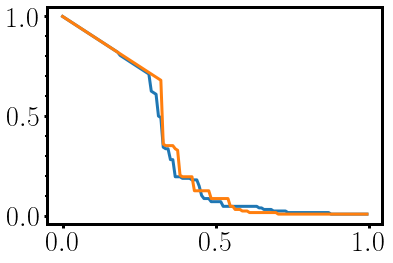

In [54]:
for attack in attacks:
    m_values = mean_stats[attack]['m']
    removed_edges = m_values/m_values[0]
    sgcc_values = mean_stats[attack]['Sgcc']
    f_values = mean_stats[attack]['f']
    #plt.plot(removed_edges, sgcc_values)
    #plt.xlim(-0.01, 0.1)
    plt.plot(f_values, sgcc_values)

NameError: name 'get_peak' is not defined

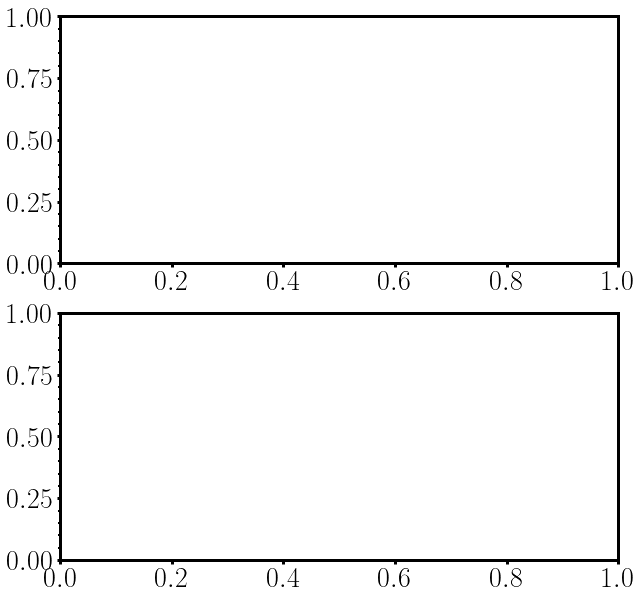

In [23]:
net_type = 'GG'
param = 'param'
sizes = [4096]
         #8192]
         #16384]
        
nseeds = 100

nrows = 2
ncols = 1
fig, axes = plt.subplots(figsize=(10*ncols, 5*nrows), nrows=nrows, ncols=ncols)     
attacks = [
    'Ran', 
    'Deg', 
    'DegU', 
    'CI', 'CIU'
    #'Btw_cutoff2', 'BtwU_cutoff2', 
    #'Btw_cutoff3', 'BtwU_cutoff3'
]
peaks = {}
for i, attack in enumerate(attacks):
    dfs = {}
    for size in sizes:
        df = load_dataframe(
            net_type, size, param, attack=attack, min_nseeds=nseeds
        )
        peak = get_peak(
            net_type, param, size, attack, nseeds, measure
        )
        peaks[attack] = peak
        dfs[size] = df
    
    ax = axes[0]
    ax.set_ylabel(r'$S_1$')
    for j, size in enumerate(sizes):
        df = dfs[size]
        label = attack_dict[attack] if j==0 else ''
        ax.plot(df.f, df.Sgcc, color=f'C{i}', label=label)
        
    ax = axes[1]
    ax.set_ylabel(r'$\langle s \rangle$')
    for size in sizes:
        df = dfs[size]
        ax.plot(df.f, df.meanS, color=f'C{i}')

for ax in axes:
    ax.axvline(
        0.377, color='k', linestyle='--', zorder=-1,
        label=r'$f_c^{\mathrm{RD}}\;\mathrm{(Norrenbrock)}$'
    )
    ax.set_xlabel(r'$f$')
    ax.set_xlim(0.2, 0.7)
    ax.set_xlim(0., 0.7)

axes[0].legend(
    loc='upper right', fontsize=20
    #oc=(0.9, 0.5)
)
plt.tight_layout()
plt.show()

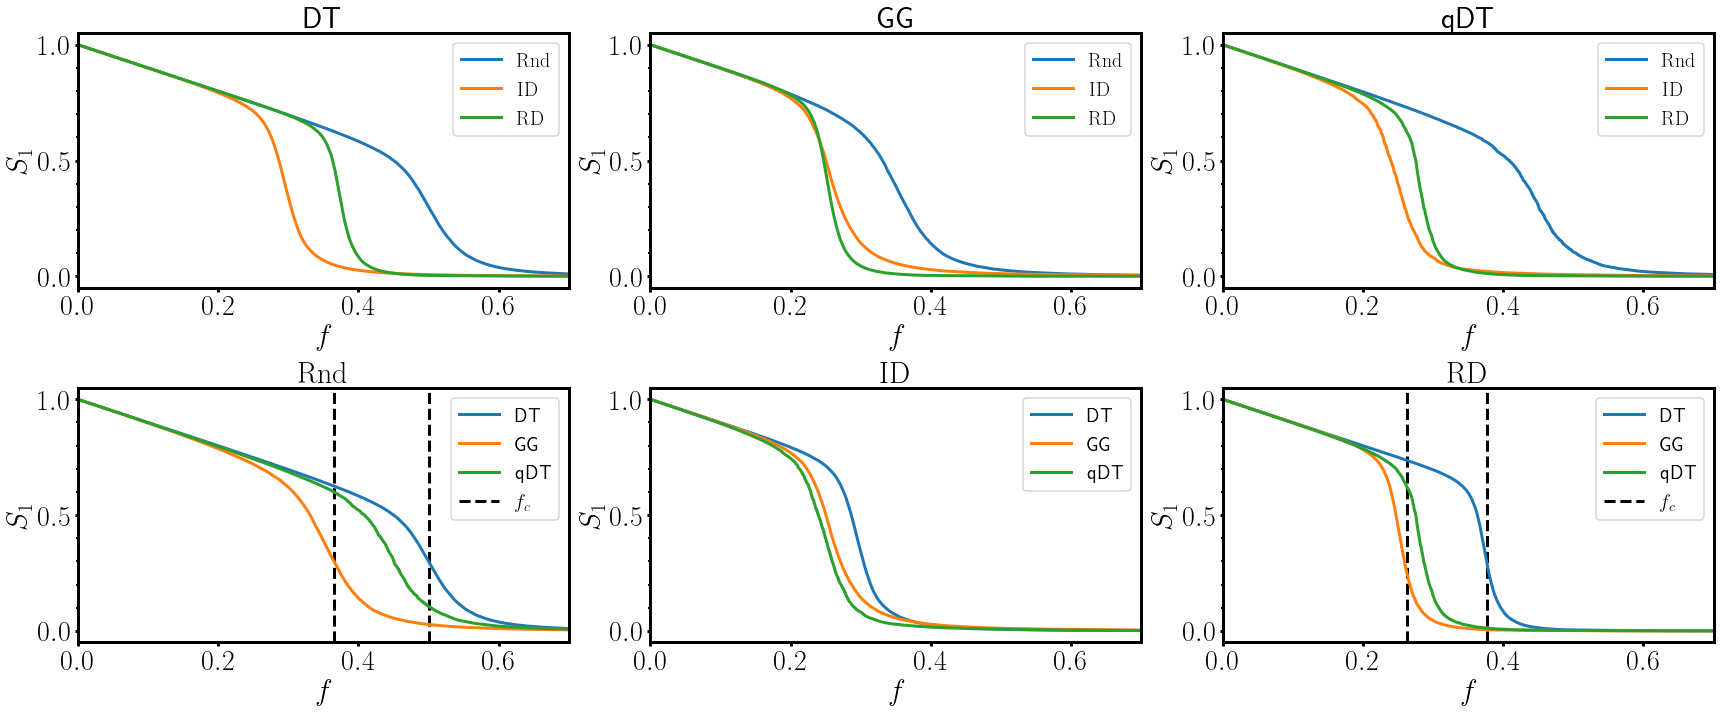

In [4]:
net_types = [
    'DT', 'GG', 'qDT', 
    #'MR'
]
params = {'DT': 'param', 'GG': 'param', 'RN': 'param', 'MR': 'k6.00', 'qDT': '5.00'}

size = 4096
nseeds = 100

fc_norrenbrock = {
    'Ran': {
        'DT': 0.5,
        'GG': 0.365,
        'RN': 0.205
    },
    'Deg': {
        
    },
    'DegU': {
        'DT': 0.377,
        'GG': 0.263,
        'RN': 0.120
    },
    'CI': {
        
    },
    'CIU': {
        
    }
}
attacks = [
    'Ran', 'Deg', 'DegU'#, 'Btw_cutoff2', 'BtwU_cutoff2'
]

nrows = 2
ncols = max([len(net_types), len(attacks)])
fig, axes = plt.subplots(figsize=(8*ncols, 5*nrows), nrows=nrows, ncols=ncols)     

for ax in axes.flatten():
    ax.set_ylabel(r'$S_1$')
    ax.set_xlabel(r'$f$')
    ax.set_xlim(0., 0.7)
    
for j, net_type in enumerate(net_types):
    param = params[net_type]
    ax = axes[0][j]
    ax.set_title(net_type, fontsize=30)
    for i, attack in enumerate(attacks):   
        df = load_dataframe(net_type, size, param, attack=attack, min_nseeds=nseeds)
        label = attack_dict[attack] #if j==0 else ''
        ax.plot(df.f, df.Sgcc, color=f'C{i}', label=label)
    
for i, attack in enumerate(attacks):
    ax = axes[1][i]
    ax.set_title(attack_dict[attack], fontsize=30)
    for j, net_type in enumerate(net_types):   
        df = load_dataframe(net_type, size, param, attack=attack, min_nseeds=nseeds)
        label = net_type
        ax.plot(df.f, df.Sgcc, color=f'C{j}', label=label)
    

for j, attack in enumerate(attacks):
    for i, net_type in enumerate(net_types):
        if net_type not in fc_norrenbrock[attack]:
            continue
        label = r'$f_c$' if i == 0 else ''
        axes[1][j].axvline(
            fc_norrenbrock[attack][net_type], color='k', linestyle='--', zorder=-1,
            label=label
        )

for ax in axes.flatten():
    ax.legend(loc='upper right', fontsize=20)
    
plt.tight_layout()
plt.show()

No handles with labels found to put in legend.


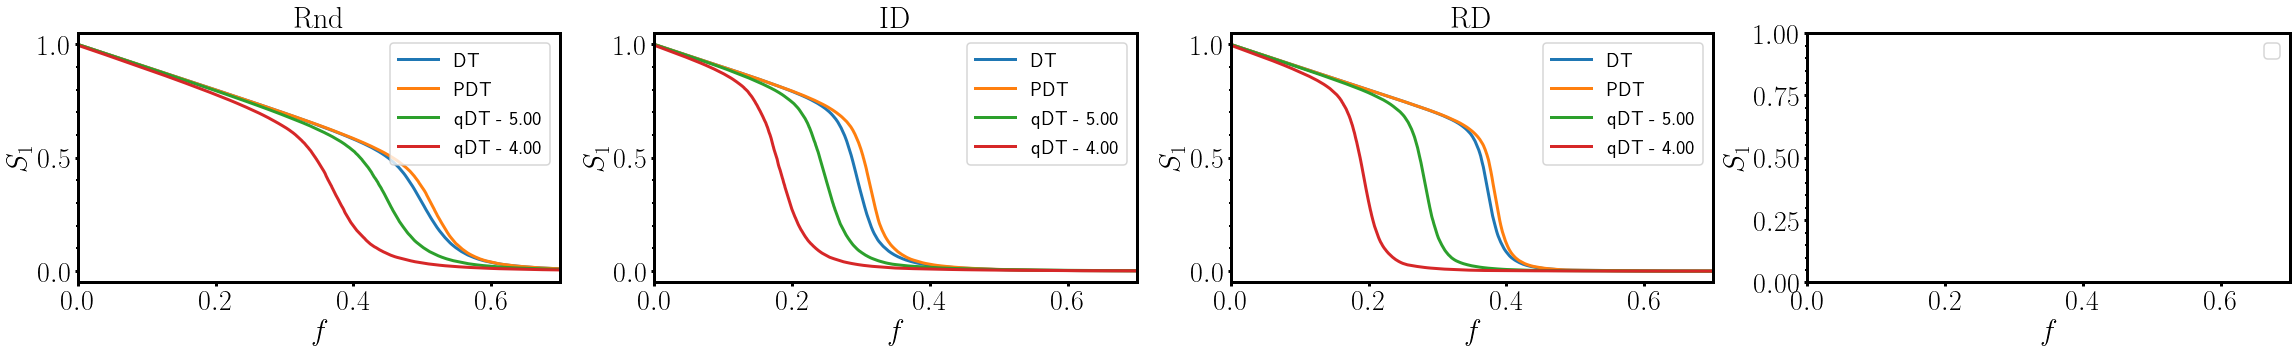

In [2]:
net_types = [
    ('DT', 'param'),
    ('PDT', 'param'),
    ('qDT', '5.00'),
    ('qDT', '4.00')
]

size = 4096
nseeds = 100

attacks = [
    'Ran', 'Deg', 'DegU'#, 'Btw_cutoff2', 'BtwU_cutoff2'
]

nrows = 1
ncols = max([len(net_types), len(attacks)])
fig, axes = plt.subplots(figsize=(8*ncols, 5*nrows), nrows=nrows, ncols=ncols)     

for ax in axes.flatten():
    ax.set_ylabel(r'$S_1$')
    ax.set_xlabel(r'$f$')
    ax.set_xlim(0., 0.7)
    
for j, attack in enumerate(attacks): 
    ax = axes[j]
    ax.set_title(attack_dict[attack], fontsize=30)
    for i, (net_type, param) in enumerate(net_types):  
        df = load_dataframe(net_type, size, param, attack=attack, min_nseeds=nseeds)
        label = f'{net_type} - {param}' if 'q' in net_type else net_type
        ax.plot(df.f, df.Sgcc, color=f'C{i}', label=label)

for ax in axes.flatten():
    ax.legend(loc='upper right', fontsize=20)
    
plt.tight_layout()
plt.show()

DT param
PDT param
qDT 5.00
qDT 4.00


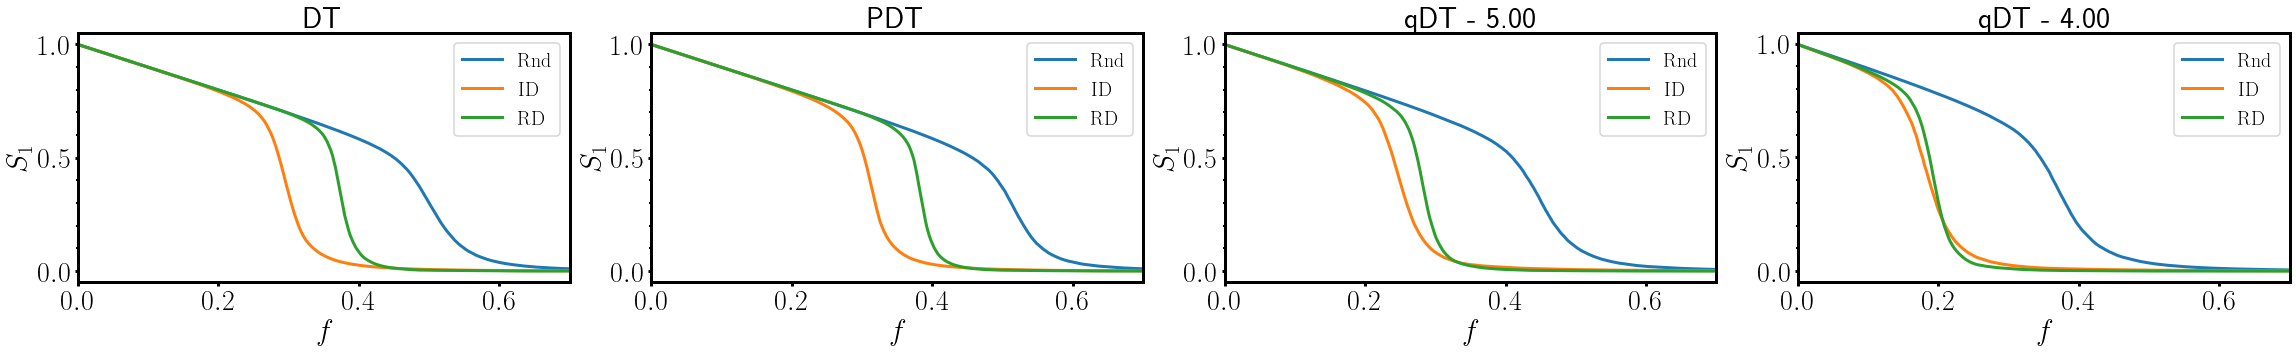

In [4]:
net_types = [
    ('DT', 'param'),
    ('PDT', 'param'),
    ('qDT', '5.00'),
    ('qDT', '4.00')
]

size = 4096
nseeds = 100

attacks = [
    'Ran', 'Deg', 'DegU'#, 'Btw_cutoff2', 'BtwU_cutoff2'
]

nrows = 1
ncols = max([len(net_types), len(attacks)])
fig, axes = plt.subplots(figsize=(8*ncols, 5*nrows), nrows=nrows, ncols=ncols)     

for ax in axes.flatten():
    ax.set_ylabel(r'$S_1$')
    ax.set_xlabel(r'$f$')
    ax.set_xlim(0., 0.7)
    
for j, (net_type, param) in enumerate(net_types):  
    print(net_type, param)
    ax = axes[j]
    title = f'{net_type} - {param}' if 'q' in net_type else net_type
    ax.set_title(title, fontsize=30)
    for i, attack in enumerate(attacks): 
        df = load_dataframe(net_type, size, param, attack=attack, min_nseeds=nseeds)
        label = attack_dict[attack]
        ax.plot(df.f, df.Sgcc, color=f'C{i}', label=label)

for ax in axes.flatten():
    ax.legend(loc='upper right', fontsize=20)
    
plt.tight_layout()
plt.show()

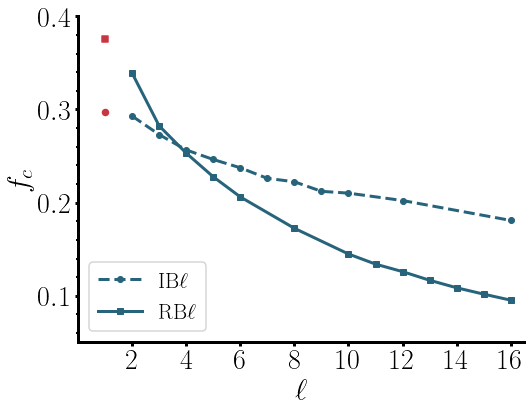

In [49]:
net_type = 'DT'
param = 'param'
size = 8192
#size = 16384
nseeds = 1000
l_values_initial = [2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 16]
l_values_updated = [2, 3, 4, 5, 6, 8, 10, 11, 12, 13, 14, 15, 16]
attacks = [
    f'Btw_cutoff{l}' for l in l_values
]
peaks_initial = []
peaks_updated = []
for i, l in enumerate(l_values_initial):
    attack = f'Btw_cutoff{l}'
    nseeds = 1000
    try:
        df = load_dataframe(net_type, size, param, attack=attack, nseeds=nseeds)
    except:
        print(attack)
        continue
    peak = get_peak(
        net_type, param, size, attack, nseeds, measure
    )
    peaks_initial.append(peak)
for i, l in enumerate(l_values_updated):    
    attack = f'BtwU_cutoff{l}'
    nseeds = 1000
    try:
        df = load_dataframe(net_type, size, param, attack=attack, nseeds=nseeds)
    except:
        print(attack)
        continue
    peak = get_peak(
        net_type, param, size, attack, nseeds, measure
    )
    peaks_updated.append(peak)
    
peak_deg = get_peak(
    net_type, param, size, 'Deg', nseeds, measure
)
peak_degU = get_peak(
    net_type, param, size, 'DegU', nseeds, measure
)

colors = {
    'Btw': '#27647b',
    'BtwU': '#27647b',
    'Deg': '#ca3542',
    'DegU': '#ca3542',
    'Ran': '#57575f'
}

linestyles = {
    'Btw': '--',
    'BtwU': '-',
    'Deg': '--',
    'DegU': '-',
    'Ran': '-'    
}

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_xlim(0, 16.5)
ax.set_yticks([ 0.1, 0.2, 0.3, 0.4])
ax.set_ylim(0.05, 0.4)
ax.set_xticks([2, 4, 6, 8, 10, 12, 14, 16])
#ax.set_title(r'$L = {{{}}}$'.format(int(np.sqrt(size))), fontsize=30)
ax.plot(l_values_initial, peaks_initial, 'o--', color=colors['Btw'], label=r'$\mathrm{IB}\ell$')
ax.plot(l_values_updated, peaks_updated, 's-', color=colors['BtwU'], label=r'$\mathrm{RB}\ell$')
#ax.axhline(peak_deg, linestyle=linestyles['Deg'], color=colors['Deg'])
#ax.axhline(peak_degU, linestyle=linestyles['DegU'], color=colors['DegU'])

ax.scatter(1, peak_deg, marker='o', color=colors['Deg'])#, label=attack_dict['Deg'])
ax.scatter(1, peak_degU, marker='s', color=colors['DegU'])#, label=attack_dict['DegU'])

ax.set_ylabel(f'$f_c$')
ax.set_xlabel('$\ell$')
ax.legend(loc='lower left', fontsize=22)
sns.despine()
plt.savefig('../seminario/DT_initial_vs_recalculated.png', transparent=True)
plt.show()

In [22]:
def get_prop(g, prop):
    prop_dict = {
        'C':        g.transitivity_undirected(mode='zero'),
        'Cws':      g.transitivity_avglocal_undirected(mode='zero'),
        'r':        g.assortativity_degree(directed=False),
        'meank':    np.mean(g.degree()),
    }
    return prop_dict[prop]

_props = ['C', 'Cws', 'r', 'meank']

def compute_properties(net_type, size, param, seeds):
    properties = defaultdict(list)
    for seed in seeds:
        seed_properties = compute_seed_properties(net_type, size, param, seed)
        for k, v in seed_properties.items():
            properties[k].append(seed_properties[k])
    return pd.DataFrame(properties)

def compute_seed_properties(net_type, size, param, seed):
    properties = {}
    g = read_network(net_type, size, param, seed)
    for prop in _props:
        properties[prop] = get_prop(g, prop)
    return properties

size = 4096
seeds = range(10)

props_by_net = {}
for net_type in net_types:
    param = params[net_type]
    properties = compute_properties(net_type, size, param, seeds)
    props_by_net[net_type] = properties
    
for net_type in net_types:
    df = props_by_net[net_type]
    print(net_type)
    display(df.mean())

DT


C        0.379384
Cws      0.435421
r       -0.123697
meank    5.987256
dtype: float64

GG


C        0.244808
Cws      0.224282
r        0.205802
meank    3.933887
dtype: float64

RN


C        0.000000
Cws      0.000000
r       -0.122229
meank    2.536182
dtype: float64

In [73]:
def get_R(df):
    area = df.Sgcc.sum() / df.shape[0]
    return area

net_type = 'DT'
param = 'param'
attack = 'DegU'
sizes = [128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536]
nseeds = 1000
peaks = []

areas = []
for i, size in enumerate(sizes):
    try:
        df = load_dataframe(net_type, size, param, attack=attack, nseeds=nseeds)
    except:
        print(attack)
        continue
        
    area = get_R(df)
    areas.append(area)
    print(size, area)
    
areas = np.array(areas)
sizes = sizes[:len(areas)]

128 0.33178851318359376
256 0.32150437927246095
512 0.31588160705566404
1024 0.311384428024292
2048 0.3089545452594757
4096 0.3069945281744003
8192 0.3058731103241444
16384 0.30498273816079857
DegU
DegU


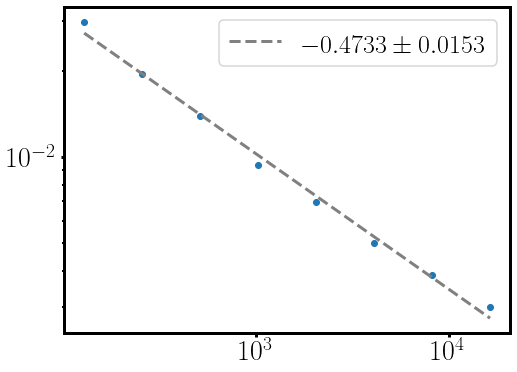

In [81]:
#area_inf = 0.3686
area_inf = 0.302

X = sizes
Y = areas-area_inf

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(X, Y, 'o')
ax.set_xscale('log')
ax.set_yscale('log')

Y_pred, slope, y_err = getLinearReg(X, Y)    
c = Y[0] / X[0]**slope
text = r'${{{:.4f}}}\pm{{{:.4f}}}$'.format(slope, y_err)
ax.plot(X, Y_pred, '--', color='grey', label=text)
ax.legend()

plt.show()

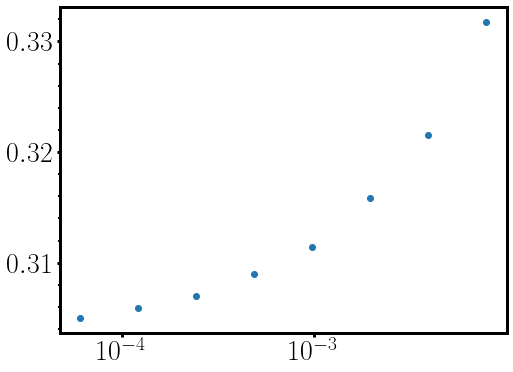

In [88]:
#area_inf = 0.3686
area_inf = 0

X = 1/np.array(sizes)
Y = areas-area_inf

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(X, Y, 'o')
ax.set_xscale('log')
#ax.set_yscale('log')

if False:
    Y_pred, slope, y_err = getLinearReg(X, Y)    
    c = Y[0] / X[0]**slope
    text = r'${{{:.4f}}}\pm{{{:.4f}}}$'.format(slope, y_err)
    ax.plot(X, Y_pred, '--', color='grey', label=text)
    ax.legend()

plt.show()

Btw_cutoff2         0.30060 +- 0.00040  0.001321
Btw_cutoff3         0.28046 +- 0.00020  0.000723
Btw_cutoff4         0.26634 +- 0.00175  0.006562
Btw_cutoff5         0.25179 +- 0.00061  0.002426
Btw_cutoff6         0.24235 +- 0.00253  0.010424
Btw_cutoff7         0.23705 +- 0.00380  0.016046
Btw_cutoff8         0.23218 +- 0.00368  0.015861
Btw_cutoff9         0.25350 +- 0.01624  0.064078
Btw_cutoff10        0.26092 +- 0.01807  0.069266
Btw_cutoff11        0.25955 +- 0.02031  0.078242
Btw_cutoff12        0.24110 +- 0.01010  0.041899
Btw_cutoff13        0.24142 +- 0.00599  0.024802
Btw_cutoff14        0.23304 +- 0.00307  0.013153
Btw_cutoff15        0.23241 +- 0.00369  0.015872
Btw_cutoff16        0.23510 +- 0.00190  0.008075


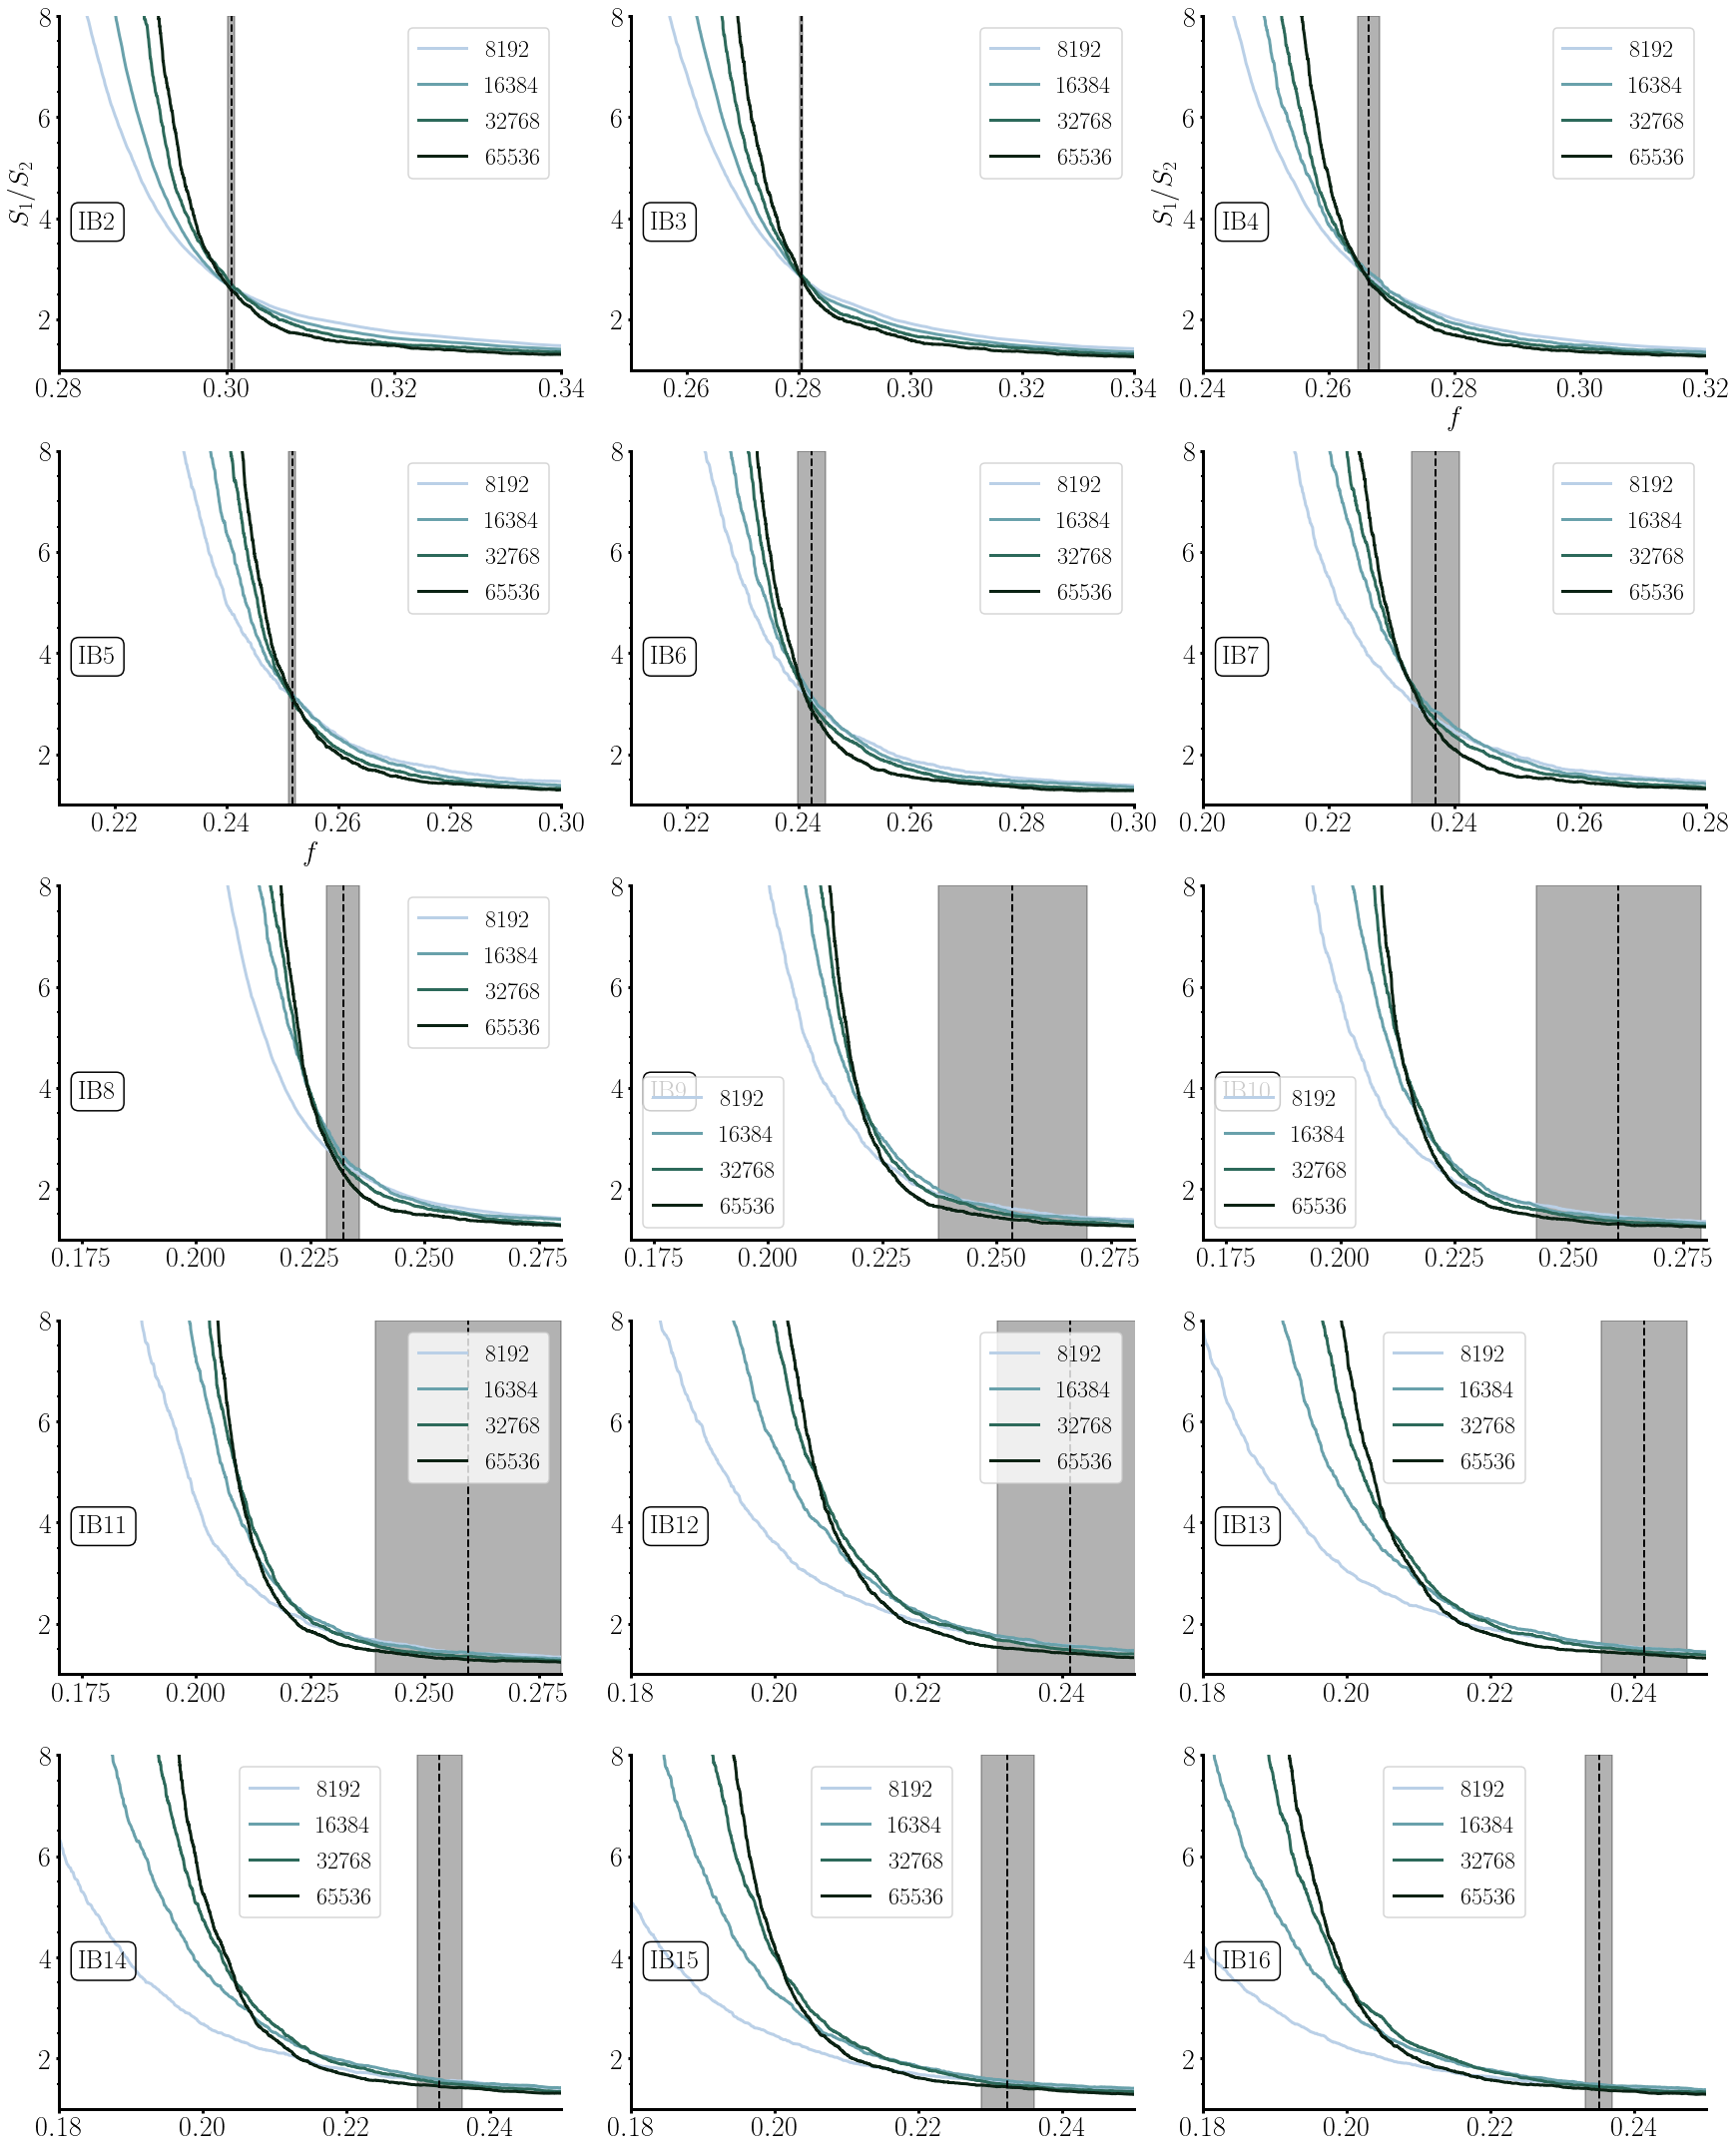

In [107]:
def plot_S1_over_S2(net_type):

    l_values = range(2, 17)
    attacks = ['Btw_cutoff%d' % l for l in l_values] #+ ['DegU', 'BtwU', 'CIU']
    
    ncols = 3
    nrows = len(attacks) // ncols 
    if len(attacks) % ncols:
        nrows += 1
    fig, axes = plt.subplots(figsize=(8*ncols, 6*nrows), ncols=ncols, nrows=nrows)
    axes = axes.flatten()

    fc_values = {}
    for j, attack in enumerate(attacks):

        sizes = [1024, 2048, 4096, 8192, 16384, 32768, 65536]  
        
        dfs = {}
        for N in sizes:
            try:
                dfs[N] = load_dataframe(net_type, N, param, attack, min_nseeds=1000)
            except FileNotFoundError:
                continue

        
        N_values = np.sort(list(dfs.keys()))[-4:]
        L_values = np.sqrt(N_values)
        
        dfs = {N: dfs[N] for N in N_values}
        
        ax = axes[j]
        if attack == 'Ran':
            fmin = 0.4
            fmax = 0.8
            ymin = 1.
            ymax = 5.       

        if attack == 'DegU':
            fmin = 0.35
            fmax = 0.4
            ymin = 1.4
            ymax = 8
            
        if attack == 'Btw':
            fmin = 0.
            fmax = 0.1
            ymin = 1.
            ymax = 4.0
            
        if attack == 'Btw_cutoff2':
            fmin = 0.28
            fmax = 0.34
            ymin = 1.
            ymax = 8.0
            
        if attack == 'Btw_cutoff3':
            fmin = 0.25
            fmax = 0.34
            ymin = 1.
            ymax = 8.0
            
        if attack == 'Btw_cutoff4':
            fmin = 0.24
            fmax = 0.32
            ymin = 1.
            ymax = 8.0
            
        if attack == 'Btw_cutoff5':
            fmin = 0.21
            fmax = 0.3
            ymin = 1.
            ymax = 8.0

        if attack == 'Btw_cutoff6':
            fmin = 0.21
            fmax = 0.3
            ymin = 1.
            ymax = 8.0
            
        if attack == 'Btw_cutoff7':
            fmin = 0.2
            fmax = 0.28
            ymin = 1.
            ymax = 8.0
            
        if attack == 'Btw_cutoff8':
            fmin = 0.17
            fmax = 0.28
            ymin = 1.
            ymax = 8
            
        if attack == 'BtwU_cutoff9':
            fmin = 0.15
            fmax = 0.28
            ymin = 1.
            ymax = 8
            
        if attack == 'BtwU_cutoff10':
            fmin = 0.15
            fmax = 0.28
            ymin = 1.
            ymax = 8
            
        if attack == 'BtwU_cutoff11':
            fmin = 0.15
            fmax = 0.28
            ymin = 1.
            ymax = 8
        
        large_l_attacks = [
            'Btw_cutoff12', 'Btw_cutoff13', 'Btw_cutoff14', 'Btw_cutoff15', 
        ]
        if attack in large_l_attacks:
            fmin = 0.18
            fmax = 0.25
            ymin = 1.
            ymax = 8

            
        ax.set_xlim(fmin, fmax)
        
        log_attacks = [
            'Btw', #'Btw_cutoff6', 
            #'Btw_cutoff8', 
            #'Btw_cutoff12'
        ]
        
        if attack in log_attacks:
            ax.set_yscale('log')
        else:
            ax.set_ylim(ymin, ymax)
            
        if j in [0, 2]:
            ax.set_ylabel(r'$S_1/S_2$', fontsize=28)
        if j in [2, 3]:
            ax.set_xlabel(r'$f$', fontsize=28)

        colors = sns.cubehelix_palette(len(N_values), start=2, rot=0.3, 
                                       light=0.8, dark=0.1)
        for i, N in enumerate(N_values):

            df = dfs[N]
            S1_over_S2 = N * df.Sgcc / df.Nsec
            ax.plot(df.f, S1_over_S2, '-', label=r'${{{}}}$'.format(N), color=colors[i])
        
        if not dfs: ## Dict is empty
            continue

        mean_fc, std_fc = compute_fc_v2(dfs, fmin, fmax, only_next=False, verbose=False)
        
        fc_values[attack] = (mean_fc, std_fc)
        
        print('{:20}{:.5f} +- {:.5f}{:10f}'.format(attack, mean_fc, std_fc, std_fc/mean_fc))
        
        ax.axvline(mean_fc, linestyle='--', color='k', linewidth=2)
        ax.fill_betweenx([ymin, ymax], mean_fc-std_fc, mean_fc+std_fc, color='k', alpha=0.3)
    
        bbox = {'boxstyle': 'round', 'fc': 'None'}
        ax.text(0.04, 0.4, attack_dict[attack], fontsize=26, transform=ax.transAxes, bbox=bbox, 
                horizontalalignment='left')
        #ax.text(0.04, 0.12, letters[j], fontsize=36, transform=ax.transAxes, 
        #        horizontalalignment='left')
        ax.legend(loc='best', fontsize=24)

    sns.despine()
    plt.tight_layout()

    fig_name = os.path.join(fig_dir, 'crossing_method_B_' + net_type)
    plt.savefig(fig_name + '.png', transparent=False)
    plt.savefig(fig_name + '.pdf')
    
    plt.show()
    
    return fc_values
    
net_type = 'DT'
fc_values = plot_S1_over_S2(net_type=net_type)

-0.19+-0.01


TypeError: only integer scalar arrays can be converted to a scalar index

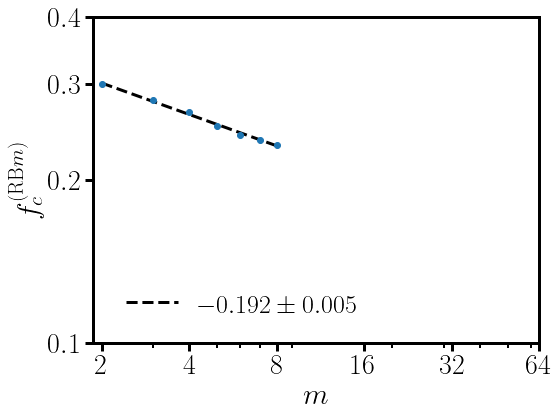

In [111]:
_l_values = []
mean_fc_values = []
for l in range(2, 9):
    attack = 'Btw_cutoff%d' % l
    if attack in fc_values:
        mean_fc, std_fc = fc_values[attack]
        
        _l_values.append(l)
        mean_fc_values.append(mean_fc)
        
ncols = 1
nrows = 1
fig, ax = plt.subplots(figsize=(8*ncols, 6*nrows), ncols=ncols, nrows=nrows)

ax.tick_params(which='minor', length=5)
ax.tick_params(which='major', length=8)
ax.set_ylabel(r'$f_c^{(\mathrm{RB}m)}$')
ax.set_xlabel(r'$m$')
ax.set_xscale('log')
ax.set_yscale('log')

X, Y = _l_values, mean_fc_values

Y_pred, slope, y_err = getLinearReg(X, Y)
c = Y[0] / X[0]**slope
label = r'${{{:.3f}}}\pm{{{:.3f}}}$'.format(slope, y_err)
print('{:.2f}+-{:.2f}'.format(slope, y_err))
#label = r'$f_c^{(\mathrm{RB}\ell)} \sim L^{-\omega}$'
ax.plot(X, Y_pred, '--', color='k', label=label)
ax.plot(X, Y, 'o')

#ax.set_xlim(12, 128)
ax.set_xticks([2, 4, 8, 16, 32, 64])
ax.get_xaxis().set_minor_formatter(mpl.ticker.NullFormatter())
ax.get_xaxis().set_major_formatter(mpl.ticker.ScalarFormatter())

#ax.set_ylim(0.15, 0.2)
ax.set_yticks([0.1, 0.2, 0.3, 0.4])
ax.get_yaxis().set_minor_formatter(mpl.ticker.NullFormatter())
ax.get_yaxis().set_major_formatter(mpl.ticker.ScalarFormatter())

ax.legend(frameon=False, loc=(0.05, 0.05))


_sizes = [8192, 16384, 32768, 65536]
for i, size in enumerate(_sizes): 
    L = np.sqrt(size)
    mask = ~np.isnan(rc_values[size][1:])
    
    X = _l_values[mask] 
    Y = rc_values[size][1:][mask]
    Y_std = rc_values_std[size][1:][mask]
    
    #ax.plot(l_values, rc_values[size][1:], 'o-', 
    ax.plot(X, Y, '--', 
            label=r'${{{}}}$'.format(size)
    )

plt.show()

No handles with labels found to put in legend.


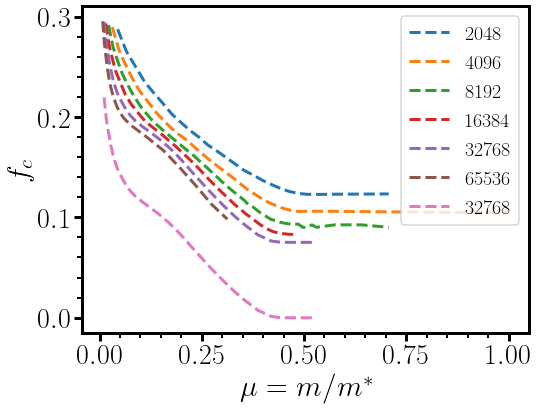

In [140]:
_l_values = []
mean_fc_values = []
for l in range(2, 9):
    attack = 'Btw_cutoff%d' % l
    if attack in fc_values:
        mean_fc, std_fc = fc_values[attack]
        
        _l_values.append(l)
        mean_fc_values.append(mean_fc)
        
ncols = 1
nrows = 1
fig, ax = plt.subplots(figsize=(8*ncols, 6*nrows), ncols=ncols, nrows=nrows)

ax.tick_params(which='minor', length=5)
ax.tick_params(which='major', length=8)
ax.set_ylabel(r'$f_c$')
ax.set_xlabel(r'$\mu=m/m^*$')
#ax.set_xscale('log')
#ax.set_yscale('log')

ax.legend(frameon=False, loc=(0.05, 0.05))


_sizes = [2048, 4096, 8192, 16384, 32768, 65536]
for i, size in enumerate(_sizes): 
    L = np.sqrt(size)
    mask = ~np.isnan(rc_values[size][1:])
    
    X = l_values[mask] / L**1#/ l_cutoff[size]
    Y = rc_values[size][1:][mask]
    Y_std = rc_values_std[size][1:][mask]
    
    #ax.plot(l_values, rc_values[size][1:], 'o-', 
    ax.plot(X, Y, '--', 
            label=r'${{{}}}$'.format(size)
    )
    
for i, size in enumerate([32768]): 
    L = np.sqrt(size)
    mask = ~np.isnan(rc_values[size][1:])
    
    X = l_values[mask] / L**1#/ l_cutoff[size]
    Y = rc_values[size][1:][mask] - rc_values[size][0]
    Y_std = rc_values_std[size][1:][mask]
    
    #ax.plot(l_values, rc_values[size][1:], 'o-', 
    ax.plot(X, Y, '--', 
            label=r'${{{}}}$'.format(size)
    )

ax.legend(fontsize=20)
plt.show()

128 2
256 4
512 5
1024 8
2048 11
4096 16
8192 22
16384 32
32768 45


FileNotFoundError: 

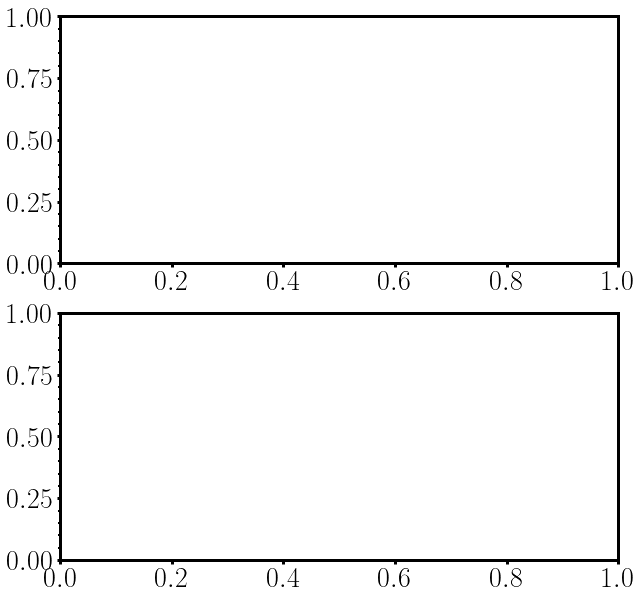

In [130]:
net_type = 'DT'
param = 'param'
sizes = [128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768]    
nseeds = 100

l_values = {}
for size in sizes:
    L = np.sqrt(size)
    l = int(L / 4)
    l_values[size] = l

nrows = 2
ncols = 1
fig, axes = plt.subplots(figsize=(10*ncols, 5*nrows), nrows=nrows, ncols=ncols)     

peaks = {}
dfs = {}
max_means ={}
max_nsec ={}
for i, size in enumerate(sizes):
    l = l_values[size]
    print(size, l)
    attack = f'Btw_cutoff{l}'
    df = load_dataframe(
        net_type, size, param, attack=attack, min_nseeds=nseeds
    )
    peak = get_peak(
        net_type, param, size, attack, nseeds, measure
    )
    peaks[size] = peak
    max_means[size] = np.max(df.meanS)
    max_nsec[size] = np.max(df.Nsec)
    dfs[size] = df
    
ax = axes[0]
ax.set_ylabel(r'$S_1$')
for i, size in enumerate(sizes):
    df = dfs[size]
    label = attack_dict[attack] if j==0 else ''
    ax.plot(df.f, df.Sgcc, color=f'C{i}', label=label)

ax = axes[1]
ax.set_ylabel(r'$\langle s \rangle$')
for i, size in enumerate(sizes):
    df = dfs[size]
    ax.plot(df.f, df.meanS, color=f'C{i}')



axes[0].legend(
    loc='upper right', fontsize=20
    #oc=(0.9, 0.5)
)
plt.tight_layout()
plt.show()

0.90+-0.02


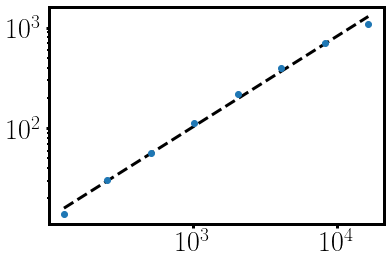

In [123]:
X, Y = zip(*list(max_means.items()))
Y_pred, slope, y_err = getLinearReg(X, Y)
c = Y[0] / X[0]**slope
label = r'${{{:.3f}}}\pm{{{:.3f}}}$'.format(slope, y_err)
print('{:.2f}+-{:.2f}'.format(slope, y_err))
#label = r'$f_c^{(\mathrm{RB}\ell)} \sim L^{-\omega}$'

fig, ax = plt.subplots()
ax.set_xscale('log')
ax.set_yscale('log')
ax.plot(X, Y_pred, '--', color='k', label=label)
ax.plot(X, Y, 'o')

0.96+-0.01


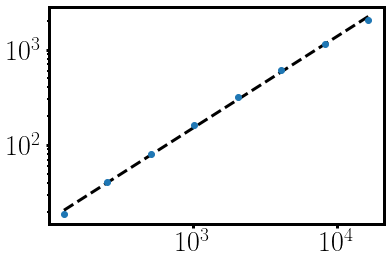

In [129]:
X, Y = zip(*list(max_nsec.items()))
Y_pred, slope, y_err = getLinearReg(X, Y)
c = Y[0] / X[0]**slope
label = r'${{{:.3f}}}\pm{{{:.3f}}}$'.format(slope, y_err)
print('{:.2f}+-{:.2f}'.format(slope, y_err))
#label = r'$f_c^{(\mathrm{RB}\ell)} \sim L^{-\omega}$'

fig, ax = plt.subplots()
ax.set_xscale('log')
ax.set_yscale('log')
ax.plot(X, Y_pred, '--', color='k', label=label)
ax.plot(X, Y, 'o')

-0.17+-0.01


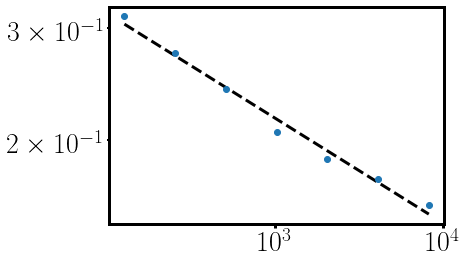

In [124]:
X, Y = zip(*list(peaks.items())[:-1])
Y_pred, slope, y_err = getLinearReg(X, Y)
c = Y[0] / X[0]**slope
label = r'${{{:.3f}}}\pm{{{:.3f}}}$'.format(slope, y_err)
print('{:.2f}+-{:.2f}'.format(slope, y_err))
#label = r'$f_c^{(\mathrm{RB}\ell)} \sim L^{-\omega}$'

fig, ax = plt.subplots()
ax.set_xscale('log')
ax.set_yscale('log')
ax.plot(X, Y_pred, '--', color='k', label=label)
ax.plot(X, Y, 'o')

In [120]:
Y

(0.2734375,
 0.240234375,
 0.2060546875,
 0.1865234375,
 0.173828125,
 0.1580810546875,
 nan)

In [6]:
l_cutoff

{128: 4,
 256: 7,
 512: 11,
 1024: 16,
 2048: 22,
 4096: 31,
 8192: 42,
 16384: 57,
 32768: 80}